In [452]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import random

import matplotlib.pyplot as plt
import seaborn as sns

In [453]:
import yfinance as yf
import requests

In [454]:
s = '2023-11-01'
e = '2023-12-31'

In [455]:
df = pd.read_csv("https://query.data.world/s/pzd7uazpmpyortmg6fsuxiaoizllgu?dws=00000", encoding='ISO-8859-1')
display(df.head())

,Public Company Name (As Listed on Exchange),B Corp Impact Data ID,Ticker 1,Ticker 2,Ticker 3,IPO Year,Year Delisted,Year Certified,Public Listing Status,Year Decertified
0,"Allbirds, Inc.",001C000001SGhnyIAD,NASDAQGS:BIRD,NaN,NaN,2021.0,NaN,2016.0,active,NaN
1,Amalgamated Financial,001C000001K16JSIAZ,NASDAQGM:AMAL,NaN,NaN,2018.0,NaN,2017.0,active,NaN
2,"AppHarvest, Inc.",0013b00001o41JFAAY,NASDAQGS:APPH,NaN,NaN,2020.0,NaN,2019.0,delisted,2023.0
3,Arezzo&Co,0013b00001qHFddAAG,BOVESPA:ARZZ3,NaN,NaN,2011.0,NaN,2022.0,active,NaN
4,Arowana International,001C000001ZzPK4IAN,ASX: AWN,NaN,NaN,2013.0,2021.0,2018.0,delisted,NaN


In [456]:
df.drop(['B Corp Impact Data ID', 'Ticker 2', 'Ticker 3'], axis=1, inplace = True)
print(len(df))
df.dropna(axis=0, subset=['Public Company Name (As Listed on Exchange)'], inplace=True)
print(len(df))

999
68


In [457]:
display(df[df['Public Listing Status'] == 'delisted'])

,Public Company Name (As Listed on Exchange),Ticker 1,IPO Year,Year Delisted,Year Certified,Public Listing Status,Year Decertified
2,"AppHarvest, Inc.",NASDAQGS:APPH,2020.0,NaN,2019.0,delisted,2023.0
4,Arowana International,ASX: AWN,2013.0,2021.0,2018.0,delisted,NaN
14,Freshlocal Solutions,TSE: LOCL,2019.0,2021.0,2013.0,delisted,NaN


In [458]:
temp = df.copy()
temp = temp[temp['Public Listing Status'] == 'active']

temp['Ticker 1'].replace(": ", ":", regex=True, inplace=True)


print(len(temp))
temp['Exchange'] = temp['Ticker 1'].str.split(":").str[0]
temp['Ticker2'] = temp['Ticker 1'].str.split(":").str[1]
temp.dropna(subset=["Ticker2"], inplace=True) # Remove any NaN tickers

display(temp.head())

65


,Public Company Name (As Listed on Exchange),Ticker 1,IPO Year,Year Delisted,Year Certified,Public Listing Status,Year Decertified,Exchange,Ticker2
0,"Allbirds, Inc.",NASDAQGS:BIRD,2021.0,NaN,2016.0,active,NaN,NASDAQGS,BIRD
1,Amalgamated Financial,NASDAQGM:AMAL,2018.0,NaN,2017.0,active,NaN,NASDAQGM,AMAL
3,Arezzo&Co,BOVESPA:ARZZ3,2011.0,NaN,2022.0,active,NaN,BOVESPA,ARZZ3
5,Australian Ethical Investment Ltd.,ASX:AEF,2002.0,NaN,2014.0,active,NaN,ASX,AEF
6,Benefit Systems S.A.,WSE:BFT,2013.0,NaN,2018.0,active,NaN,WSE,BFT


### Stocks are from Global Exchanges - build and maintain an exchange conversion dictionary to interface with Yahoo Finance

In [459]:
exchange_dict = {'ASX': '.XA', 
                 'WSE': '.WA',
                 'BOVESPA': '.SA',
                 'ETHEX': '',
                 'TSX': '.TO',
                 'ENXTPA': '.PA',
                 'BME': '.MC',
                 'ENXTBR': '.BR',
                 'KLSE': '.KL',
                 'LSE': '.AQ',
                 'TWSE': '.TW',
                 'NZSE': '.NZ',
                 'SGX': '.SI',
                 'BIT': '.MI',
                 'TASE': '.TA',
                 'XMIL': '.MI',
                 'NZE': '.NZ',
                 'BVMF': '.SA',
                 'HKG': '.HK',
                 'LON': '.L',
                 'MIL': '.MI',
                 'MOVI3': '.SA',
                 'TSE': '.T',
                 'BRK': '.L',
                 'SNSE': '.SN',
                 'MOVIDA B3': '.SA',
                 'NYSE': '',
                 'NASDAQGS': '',
                 'NASDAQGM': '',
                 'NASDAQCM': ''
                }

exchange_map = {exchanges: extention
                 for exchanges, extention in exchange_dict.items()
                 for exchange in exchanges}

temp['Intl Extention'] = temp['Exchange'].map(exchange_map)

In [460]:
temp['Ticker'] = temp['Ticker2'] + temp['Intl Extention'] 
mask = temp['Ticker'].isna()

# Check to see if we missed any:
temp[mask]

,Public Company Name (As Listed on Exchange),Ticker 1,IPO Year,Year Delisted,Year Certified,Public Listing Status,Year Decertified,Exchange,Ticker2,Intl Extention,Ticker
19,Heidelberg District Community Enterprise Limited,NSX:EIC,2019.0,NaN,2019.0,active,NaN,NSX,EIC,NaN,NaN
36,SIDERPERU,BVL:SIDERC1,2006.0,NaN,2022.0,active,NaN,BVL,SIDERC1,NaN,NaN
41,Urb-it AB (publ),OM:URBIT,2017.0,NaN,2020.0,active,NaN,OM,URBIT,NaN,NaN
48,Weleda AG Group,OTC-X:BEKB:Weleda N-PS,NaN,NaN,2021.0,active,NaN,OTC-X,BEKB,NaN,NaN
56,Vinedos Emiliana S.A.,XSGO:EMILIANA,1996.0,NaN,2023.0,active,NaN,XSGO,EMILIANA,NaN,NaN


In [461]:
#Find datafeed issues
tickers = temp['Ticker'].to_list()

count = 0
for t in tickers:
    try:
        ticker = yf.Ticker(t)
        info = None
    except:
        count +=1
        print(f"Cannot get info of {t}, it probably does not exist")

print("Total nans =", count, "which is", round(count/temp.shape[0],2)*100, '% of the total')


Cannot get info of nan, it probably does not exist
Cannot get info of nan, it probably does not exist
Cannot get info of nan, it probably does not exist
Cannot get info of nan, it probably does not exist
Cannot get info of nan, it probably does not exist
Total nans = 5 which is 8.0 % of the total


In [462]:
# Remove Nans from stock universe:

b_corp_df = temp[-mask].copy()
display(b_corp_df.head())


,Public Company Name (As Listed on Exchange),Ticker 1,IPO Year,Year Delisted,Year Certified,Public Listing Status,Year Decertified,Exchange,Ticker2,Intl Extention,Ticker
0,"Allbirds, Inc.",NASDAQGS:BIRD,2021.0,NaN,2016.0,active,NaN,NASDAQGS,BIRD,,BIRD
1,Amalgamated Financial,NASDAQGM:AMAL,2018.0,NaN,2017.0,active,NaN,NASDAQGM,AMAL,,AMAL
3,Arezzo&Co,BOVESPA:ARZZ3,2011.0,NaN,2022.0,active,NaN,BOVESPA,ARZZ3,.SA,ARZZ3.SA
5,Australian Ethical Investment Ltd.,ASX:AEF,2002.0,NaN,2014.0,active,NaN,ASX,AEF,.XA,AEF.XA
6,Benefit Systems S.A.,WSE:BFT,2013.0,NaN,2018.0,active,NaN,WSE,BFT,.WA,BFT.WA


In [463]:
isolate_us = False
if isolate_us:

    exchanges = set(temp['Exchange'])
    print(exchanges)
    us_ex = ['NYSE', 'NASDAQGS','NASDAQGM', 'NASDAQCM']
    us = temp[temp['Exchange'].isin(us_ex)]
    print("Isolating US Companies")
    display(us.head())


### List of Companies with B-Corp Subsidiaries
Unilever (NYSE: UN): (Pukka (UK), Mãe Terra (Brazil), Sir Kensington’s (US), Ben & Jerry’s (US), Olly Nutrition (US), Seventh Generation (US), Sundial (US), T2 Tea (Australia), Graze (UK))

B2W (B3: BTOW3): Courrieros (Brazil)

Grupo Soma (B3: SOMA3): Companhia Hering (Brazil)

Arezzo&Co (B3: ARZZ3): Reserva (Brazil)

Procter & Gamble (NYSE: PG): (New Chapter (US))

AB Inbev: (4 Pines Brewing Company)

Banco Estado: (Banco Estado Microempresas, Caja Vecina)

Coca-Cola: (Innocent Drinks)

Fairfax Financial: (The Redwoods Group)

Gap: (Athleta, Hill City)

Kikkoman: (Country Life)

Lactalis: (Stonyfield Farm)

Land O’ Lakes: (Vermonta Creamery)

Nestle: (Essential Living Foods, Garden of Life, Lily's Kitchen)

Oppenheimer Funds Inc.: (SNW Asset Management)

Rakuten: (OverDrive)

The Hain Celestial Group: (Ella’s Kitchen)

Vina Concha y Toro: (Fetzer Vineyards)


Hortfruti S.A.: Hortifruti Chile

Danone SA: (Danone North America, Alpro, Danone Waters of America, Danone Canada, -Aguas Danone Argentina, Bledina, Danone Aqua Indonesia, Danone Egypt, Danone Iberia, Danone Manifesto Ventures, Danone UK, Grameen Danone Foods, Happy Family, Les 2 Vaches, Danone Waters Germany, Danone Dairy Ireland, Danone Waters Spain, Danone Netherlands, Danone Dairy Belgium, Nutricia Bago, Danone ELN Greater China, Danone Japan, Volvic, Danone Brazil)

Caixabank (Imagin Ban)

Banco Sabadell (Sogeviso)

iSun (SunCommon)

In [464]:
add_subs = True
public_subs = ['UL', 'SOMA3.SA', 'ABI.BR', 'PG', 'FFH.TO', 'KO', 'GPS', 'KIK.F', 'NESN.SW',
               'OPY', '4755.T', 'HAIN', 'DANOY', 'CABK.MC', 'ISUN']

In [465]:
def get_stock_data (df):
    tickers_list = df['Ticker'].tolist()
    if add_subs:
        tickers_list = tickers_list + public_subs
    tickers_data= {}
    
    for ticker in tickers_list:
        ticker_object = yf.Ticker(ticker)
        
        #convert info() output from dictionary to dataframe
        temp = pd.DataFrame.from_dict(ticker_object.info, orient="index")
        temp.reset_index(inplace=True)
        temp.columns = ["Attribute", "Recent"]

        # add (ticker, dataframe) to main dictionary
        tickers_data[ticker] = temp

    return tickers_data
        
        

In [466]:
if isolate_us:
    load_stock_data = get_stock_data (us)
else:
    load_stock_data = get_stock_data (b_corp_df)
    
print("Number of Stock Records Loaded", len(load_stock_data))

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SZL.XA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SZL.XA&crumb=FUh37WBIK1d


Number of Stock Records Loaded 71


In [467]:
# Clean df:
stock_data = pd.concat(load_stock_data) #turn from dict to df
stock_data = stock_data.reset_index()

del stock_data["level_1"] # clean up unnecessary column
stock_data.columns = ["Ticker", "Attribute", "Recent"] # update column names


attr_to_keep = ['shortName', 'longName', 'industry', 'sector','previousClose', 'sharesOutstanding', 'impliedSharesOutstanding',
               'marketCap',  'currency', 'country', 'website', 'enterpriseValue',
                'trailingEps', 'forwardEps', 'enterprisetoEbitda', 'ebitda', 'grossMargins', 'ebitdaMargins', 'operatingMargins']


stock_data = stock_data[stock_data["Attribute"].isin(attr_to_keep)].reset_index()
del stock_data["index"] # clean up unnecessary column



display(stock_data.head(15))

,Ticker,Attribute,Recent
0,BIRD,country,United States
1,BIRD,website,https://www.allbirds.com
2,BIRD,industry,Apparel Retail
3,BIRD,sector,Consumer Cyclical
4,BIRD,previousClose,0.6188
5,BIRD,marketCap,96651704
6,BIRD,currency,USD
7,BIRD,enterpriseValue,59948084
8,BIRD,sharesOutstanding,102641000
9,BIRD,impliedSharesOutstanding,155188992


In [468]:
print("Number of Stocks:", len(stock_data['Ticker'].unique()))
display(stock_data['Ticker'].unique())

Number of Stocks: 68


array(['BIRD', 'AMAL', 'ARZZ3.SA', 'AEF.XA', 'BFT.WA', 'BIO.XA',
       'CWEB.TO', 'CLSA3.SA', 'MLMFI.PA', 'COUR', 'FLOW.TO', 'FREY.PA',
       'GFI.NZ', 'GROV', 'HAN.MC', 'HLZ.MC', 'INCLU.BR', 'IBAB.BR',
       'KPG.XA', 'KCT.AQ', 'KMD.NZ', 'LMND', 'LFG.XA', 'MOVI3.SA',
       'NTCO3.SA', '2897.TW', '1H2.SI', 'ALQP.PA', 'RETI.MI', '6088.T',
       'SML.NZ', 'COCO', 'VNT.MI', 'CONCHATORO.SN', 'VITL', 'VVPR',
       'VHT.XA', 'WRBY', 'ZVIA', 'ABB.XA', 'TIME.MI', 'CVT.NZ', 'DOX.MI',
       'SOMA3.SA', '1112.HK', 'HMGS.TA', '1346.HK', '0973.HK', 'MME.XA',
       'MPR.XA', 'TENG.L', 'TPX.L', 'XSG.L', 'XHS.MI', 'UL', 'ABI.BR',
       'PG', 'FFH.TO', 'KO', 'GPS', 'KIK.F', 'NESN.SW', 'OPY', '4755.T',
       'HAIN', 'DANOY', 'CABK.MC', 'ISUN'], dtype=object)

In [469]:
stock_data_filtered = stock_data.pivot(columns = 'Attribute', index='Ticker', values='Recent')
stock_data_filtered.columns

# More info:
#stock_data_filtered = stock_data_filtered[['shortName', 'longName','country', 'currency', 'previousClose',
#                                           'sharesOutstanding', 'impliedSharesOutstanding','marketCap', 'enterpriseValue',
#                                           'ebitda', 'forwardEps',  'trailingEps', 'grossMargins', 'operatingMargins', 'ebitdaMargins',
#                                             'industry', 'sector', 'website']]
# Only essential info:
stock_data_filtered = stock_data_filtered[['shortName', 'longName','country', 'currency', 'previousClose',
                                           'impliedSharesOutstanding','marketCap','industry', 'sector', 'website']]

display(stock_data_filtered.head(10))

Attribute,shortName,longName,country,currency,previousClose,impliedSharesOutstanding,marketCap,industry,sector,website
Ticker,,,,,,,,,,
0973.HK,L'OCCITANE,L'Occitane International S.A.,Luxembourg,HKD,31.2,1472169984,46520573952,Household & Personal Products,Consumer Defensive,https://group.loccitane.com
1112.HK,H&H INTL HLDG,Health and Happiness (H&H) International Holdi...,Hong Kong,HKD,11.14,645561024,7088259584,Packaged Foods,Consumer Defensive,https://www.hh.global
1346.HK,LEVER STYLE,Lever Style Corporation,Hong Kong,HKD,0.95,645899008,607145024,Apparel Manufacturing,Consumer Cyclical,https://www.leverstyle.com
1H2.SI,$ Olive Tree,Olive Tree Estates Limited,Singapore,SGD,0.078,124756000,9035910,Real Estate - Diversified,Real Estate,https://www.olivetreeestates.com
2897.TW,O-BANK CO LTD,"O-Bank Co., Ltd.",Taiwan,TWD,9.9,2716470016,27164700672,Banks - Regional,Financial Services,https://www.o-bank.com
4755.T,RAKUTEN GROUP INC,"Rakuten Group, Inc.",Japan,JPY,879.1,2142140032,1854664867840,Internet Retail,Consumer Cyclical,https://global.rakuten.com/corp
6088.T,SIGMAXYZ HOLDINGS INC,SIGMAXYZ Holdings Inc.,Japan,JPY,1716.0,42581400,73618423808,Specialty Business Services,Industrials,https://www.sigmaxyz.com
ABB.XA,AUSSIEBAND FPO,Aussie Broadband Limited,Australia,AUD,3.6,NaN,NaN,NaN,NaN,https://www.aussiebroadband.com.au
ABI.BR,AB INBEV,Anheuser-Busch InBev SA/NV,Belgium,EUR,55.82,282105984,110587289600,Beverages - Brewers,Consumer Defensive,https://www.ab-inbev.com


### Incorporate exchange rates to translate price and market cap into USD

In [470]:
# Get avaialable currencies
currency_dict = {}

url = "https://currency-conversion-and-exchange-rates.p.rapidapi.com/symbols"

    #headers = {"X-RapidAPI-Key": "af4b092441msh3f4304a0bce0366p1680a3jsn93d4c3a0659f",
headers = {"X-RapidAPI-Key": "884638c782msh3dc9c5784730cc0p1a0f42jsnf54c2327e84c",
    "X-RapidAPI-Host": "currency-conversion-and-exchange-rates.p.rapidapi.com"
          }

response = requests.get(url, headers=headers)

api_data = response.json()
#print(api_data)

    
for symbol, curr in api_data['symbols'].items():
    currency_dict[symbol] = [curr, 0]

#currency_dict
    

In [471]:
## Access Exchange Rates:

url = "https://currency-conversion-and-exchange-rates.p.rapidapi.com/latest"

#querystring = {"from":"USD","to":"EUR,GBP"}
querystring = {'base':'USD', 'date': '2024-02-01'}

    #headers = {"X-RapidAPI-Key": "af4b092441msh3f4304a0bce0366p1680a3jsn93d4c3a0659f",
headers = {"X-RapidAPI-Key": "884638c782msh3dc9c5784730cc0p1a0f42jsnf54c2327e84c",
    "X-RapidAPI-Host": "currency-conversion-and-exchange-rates.p.rapidapi.com"
          }

response = requests.get(url, headers=headers, params=querystring)

exch_data = response.json()

for key in exch_data: 
    print(key,":", exch_data[key]) 

timestamp : 1711555684
base : USD
success : True
date : 2024-03-27
rates : {'ANG': 1.80267, 'SVC': 8.751594, 'CAD': 1.358965, 'XCD': 2.70255, 'MVR': 15.450114, 'HRK': 6.882375, 'AUD': 1.53245, 'MWK': 1739.999587, 'XAG': 0.040779, 'MAD': 10.118502, 'PHP': 56.2625, 'NAD': 18.980276, 'GNF': 8594.999939, 'KES': 130.999758, 'MZN': 63.521876, 'BTN': 83.358137, 'MGA': 4389.999547, 'AZN': 1.699294, 'XAU': 0.000456, 'RON': 4.594897, 'CHF': 0.905735, 'EGP': 47.250402, 'BSD': 1.000222, 'TWD': 31.995498, 'GGP': 0.791928, 'LVL': 0.60489, 'MMK': 2100.456621, 'WST': 2.766241, 'ILS': 3.676705, 'BHD': 0.376959, 'GBP': 0.79173, 'TZS': 2551.999896, 'SDG': 600.999924, 'LAK': 20950.000029, 'DJF': 178.109922, 'BYN': 3.272789, 'LBP': 89750.000016, 'RWF': 1288, 'PEN': 3.729736, 'EUR': 0.923955, 'ZMK': 9001.206879, 'RSD': 108.276012, 'INR': 83.32845, 'MUR': 46.289626, 'BWP': 13.710646, 'GEL': 2.710217, 'KMF': 454.525034, 'UZS': 12615.000444, 'RUB': 92.484979, 'CUC': 1, 'BGN': 1.806393, 'JOD': 0.708899, 'NGN': 

In [472]:
## Combine date from exch_data with names / symbols in currency_dict:

for symbol, rate in exch_data['rates'].items():
    for key in currency_dict.keys():
        if symbol == key:
            currency_dict[key][1] = rate

In [473]:
currency_dict

{'ANG': ['Netherlands Antillean Guilder', 1.80267],
 'SVC': ['Salvadoran Colón', 8.751594],
 'CAD': ['Canadian Dollar', 1.358965],
 'XCD': ['East Caribbean Dollar', 2.70255],
 'MVR': ['Maldivian Rufiyaa', 15.450114],
 'HRK': ['Croatian Kuna', 6.882375],
 'AUD': ['Australian Dollar', 1.53245],
 'MWK': ['Malawian Kwacha', 1739.999587],
 'XAG': ['Silver (troy ounce)', 0.040779],
 'MAD': ['Moroccan Dirham', 10.118502],
 'PHP': ['Philippine Peso', 56.2625],
 'NAD': ['Namibian Dollar', 18.980276],
 'GNF': ['Guinean Franc', 8594.999939],
 'KES': ['Kenyan Shilling', 130.999758],
 'MZN': ['Mozambican Metical', 63.521876],
 'BTN': ['Bhutanese Ngultrum', 83.358137],
 'MGA': ['Malagasy Ariary', 4389.999547],
 'AZN': ['Azerbaijani Manat', 1.699294],
 'XAU': ['Gold (troy ounce)', 0.000456],
 'RON': ['Romanian Leu', 4.594897],
 'CHF': ['Swiss Franc', 0.905735],
 'EGP': ['Egyptian Pound', 47.250402],
 'BSD': ['Bahamian Dollar', 1.000222],
 'TWD': ['New Taiwan Dollar', 31.995498],
 'GGP': ['Guernsey Po

In [474]:
## Add exhange rates and calculate USD equivalents:

#exchange_map = {exchanges: extention
#                 for exchanges, extention in exchange_dict.items()
#                 for exchange in exchanges}


currency_map = {symbols: rate
                 for symbols, name in currency_dict.items()
                 for rate in name}



stock_data_filtered['USDExchangeRate'] = stock_data_filtered['currency'].map(currency_map)



In [475]:
# Check to see that exchange rates mapped correctly:
stock_data_filtered.head(15)

Attribute,shortName,longName,country,currency,previousClose,impliedSharesOutstanding,marketCap,industry,sector,website,USDExchangeRate
Ticker,,,,,,,,,,,
0973.HK,L'OCCITANE,L'Occitane International S.A.,Luxembourg,HKD,31.2,1472169984,46520573952,Household & Personal Products,Consumer Defensive,https://group.loccitane.com,7.823499
1112.HK,H&H INTL HLDG,Health and Happiness (H&H) International Holdi...,Hong Kong,HKD,11.14,645561024,7088259584,Packaged Foods,Consumer Defensive,https://www.hh.global,7.823499
1346.HK,LEVER STYLE,Lever Style Corporation,Hong Kong,HKD,0.95,645899008,607145024,Apparel Manufacturing,Consumer Cyclical,https://www.leverstyle.com,7.823499
1H2.SI,$ Olive Tree,Olive Tree Estates Limited,Singapore,SGD,0.078,124756000,9035910,Real Estate - Diversified,Real Estate,https://www.olivetreeestates.com,1.348085
2897.TW,O-BANK CO LTD,"O-Bank Co., Ltd.",Taiwan,TWD,9.9,2716470016,27164700672,Banks - Regional,Financial Services,https://www.o-bank.com,31.995498
4755.T,RAKUTEN GROUP INC,"Rakuten Group, Inc.",Japan,JPY,879.1,2142140032,1854664867840,Internet Retail,Consumer Cyclical,https://global.rakuten.com/corp,151.355498
6088.T,SIGMAXYZ HOLDINGS INC,SIGMAXYZ Holdings Inc.,Japan,JPY,1716.0,42581400,73618423808,Specialty Business Services,Industrials,https://www.sigmaxyz.com,151.355498
ABB.XA,AUSSIEBAND FPO,Aussie Broadband Limited,Australia,AUD,3.6,NaN,NaN,NaN,NaN,https://www.aussiebroadband.com.au,1.532450
ABI.BR,AB INBEV,Anheuser-Busch InBev SA/NV,Belgium,EUR,55.82,282105984,110587289600,Beverages - Brewers,Consumer Defensive,https://www.ab-inbev.com,0.923955


In [476]:
# Calculate USD price and USD marketcap
stock_data_filtered['previousCloseUSD'] = stock_data_filtered['previousClose'] / stock_data_filtered['USDExchangeRate']
stock_data_filtered['marketCapUSD'] = stock_data_filtered['marketCap'] / stock_data_filtered['USDExchangeRate']
stock_data_filtered.head(20)

Attribute,shortName,longName,country,currency,previousClose,impliedSharesOutstanding,marketCap,industry,sector,website,USDExchangeRate,previousCloseUSD,marketCapUSD
Ticker,,,,,,,,,,,,,
0973.HK,L'OCCITANE,L'Occitane International S.A.,Luxembourg,HKD,31.2,1472169984,46520573952,Household & Personal Products,Consumer Defensive,https://group.loccitane.com,7.823499,3.987985,5946261890.23607
1112.HK,H&H INTL HLDG,Health and Happiness (H&H) International Holdi...,Hong Kong,HKD,11.14,645561024,7088259584,Packaged Foods,Consumer Defensive,https://www.hh.global,7.823499,1.423915,906021664.219552
1346.HK,LEVER STYLE,Lever Style Corporation,Hong Kong,HKD,0.95,645899008,607145024,Apparel Manufacturing,Consumer Cyclical,https://www.leverstyle.com,7.823499,0.121429,77605304.73641
1H2.SI,$ Olive Tree,Olive Tree Estates Limited,Singapore,SGD,0.078,124756000,9035910,Real Estate - Diversified,Real Estate,https://www.olivetreeestates.com,1.348085,0.05786,6702774.676671
2897.TW,O-BANK CO LTD,"O-Bank Co., Ltd.",Taiwan,TWD,9.9,2716470016,27164700672,Banks - Regional,Financial Services,https://www.o-bank.com,31.995498,0.309419,849016341.986613
4755.T,RAKUTEN GROUP INC,"Rakuten Group, Inc.",Japan,JPY,879.1,2142140032,1854664867840,Internet Retail,Consumer Cyclical,https://global.rakuten.com/corp,151.355498,5.80818,12253700013.196745
6088.T,SIGMAXYZ HOLDINGS INC,SIGMAXYZ Holdings Inc.,Japan,JPY,1716.0,42581400,73618423808,Specialty Business Services,Industrials,https://www.sigmaxyz.com,151.355498,11.337547,486394117.034321
ABB.XA,AUSSIEBAND FPO,Aussie Broadband Limited,Australia,AUD,3.6,NaN,NaN,NaN,NaN,https://www.aussiebroadband.com.au,1.532450,2.349179,NaN
ABI.BR,AB INBEV,Anheuser-Busch InBev SA/NV,Belgium,EUR,55.82,282105984,110587289600,Beverages - Brewers,Consumer Defensive,https://www.ab-inbev.com,0.923955,60.414198,119689042864.641678


## Filter Universe of Stocks by USD MarketCap

In [477]:
def filter_index(df, size=True, num=True, size_thresh = 1000000000, num_thresh = 20):
    temp = df.copy()
    if size == True:
        temp = temp[temp['marketCapUSD'] >= size_thresh]
    
    if num == True:
        temp.sort_values(by=['marketCapUSD'], ascending=False, inplace = True)
        temp = temp.iloc[0:num_thresh,:]
            
    return temp



In [478]:
stock_index_top20 = filter_index(stock_data_filtered, size = False, num_thresh=20)
stock_index_top30 = filter_index(stock_data_filtered, size = False, num_thresh=30)
stock_index_over1b = filter_index(stock_data_filtered, size = True, num=False, size_thresh=1000000000)

print(stock_index_top20.shape, stock_index_top30.shape, stock_index_over1b.shape )

(20, 13) (30, 13) (20, 13)


In [479]:
stock_index_top20['currency']

Ticker
PG          USD
NESN.SW     CHF
KO          USD
UL          USD
ABI.BR      EUR
DANOY       USD
CABK.MC     EUR
FFH.TO      CAD
KIK.F       EUR
4755.T      JPY
GPS         USD
0973.HK     HKD
NTCO3.SA    BRL
COUR        USD
BFT.WA      PLN
WRBY        USD
ARZZ3.SA    BRL
COCO        USD
SOMA3.SA    BRL
LMND        USD
Name: currency, dtype: object

### Set Index and Get Price History

In [480]:
stock_index = stock_index_top20.copy()
start_date = s
end_date = e

In [481]:
def get_price_history2 (df, start = start_date, end=end_date):
    tickers_list = df.index.tolist()
    tickers_data= {}
    first_object = yf.Ticker(tickers_list[0])
    
    prices = pd.DataFrame.from_dict(first_object.history(start=start, end=end, interval = "1d"))
    prices.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
    prices.columns = [tickers_list[0]]

    
    for ticker in tickers_list[1:]:
        ticker_object = yf.Ticker(ticker)
        try:
            temp = pd.DataFrame.from_dict(ticker_object.history(start=start, end=end, interval = "1d"))
            temp.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
            temp.columns = [ticker]
            prices = prices.merge(temp, how="outer", left_index=True, right_index=True)
        except:
            continue
    
    
    # Collapse date across international zones:
    prices.index = pd.to_datetime(prices.index).date
    prices = prices.groupby(prices.index).ffill() 
    prices = prices.groupby(prices.index).bfill()
    prices = prices.groupby(prices.index).last()
    
    
    return prices

In [515]:
price_history_df = get_price_history2 (stock_index)
stock_universe = list(price_history_df.columns)
stock_universe

['PG',
 'NESN.SW',
 'KO',
 'UL',
 'ABI.BR',
 'DANOY',
 'CABK.MC',
 'FFH.TO',
 'KIK.F',
 '4755.T',
 'GPS',
 '0973.HK',
 'NTCO3.SA',
 'COUR',
 'BFT.WA',
 'WRBY',
 'ARZZ3.SA',
 'COCO',
 'SOMA3.SA',
 'LMND']

In [483]:
display(price_history_df.head())

,PG,NESN.SW,KO,UL,ABI.BR,DANOY,CABK.MC,FFH.TO,KIK.F,4755.T,GPS,0973.HK,NTCO3.SA,COUR,BFT.WA,WRBY,ARZZ3.SA,COCO,SOMA3.SA,LMND
2023-10-31,NaN,99.379997,NaN,NaN,53.380001,NaN,3.795,NaN,54.5,551.099976,NaN,20.049999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-01,148.671066,100.519997,55.549816,46.348526,54.389999,12.13,3.784,1142.130615,58.5,554.400024,12.837246,19.920000,11.632296,17.830000,1755.0,12.41,57.044178,28.040001,5.41,11.00
2023-11-02,150.489594,99.750000,56.189564,46.800129,55.110001,12.18,3.786,1137.299194,60.0,NaN,13.432940,20.000000,NaN,18.010000,1705.0,12.93,NaN,28.480000,NaN,16.17
2023-11-03,149.128189,NaN,55.845081,46.770679,NaN,12.24,NaN,1203.916626,NaN,NaN,13.939282,NaN,12.362782,18.049999,NaN,13.66,59.586674,28.930000,5.88,17.32
2023-11-05,NaN,99.870003,NaN,NaN,54.840000,NaN,3.818,NaN,60.5,568.799988,NaN,20.049999,NaN,NaN,1750.0,NaN,NaN,NaN,NaN,NaN


In [484]:
def get_country_info(price_df, info_df):
    tickers_list = price_df.columns
    
    #access currency, impliedSharesOutstanding (local currency): ## HAVE TO REVIEW FOR STOCK CHANGES
    currencies = []
    implied_SO = []
    for col in price_df.columns:
        idx = np.where(info_df.index == col)
        currencies.append(info_df.iloc[idx]['currency'].values[0])
        implied_SO.append(info_df.iloc[idx]['impliedSharesOutstanding'].values[0])
        
    for i in range(len(price_df.columns)):
        col = price_df.columns[i]
        price_df[col+'_currency'] = currencies[i]
        price_df[col+'_SO'] = implied_SO[i]
    
    return price_df, currencies
     

In [485]:
price_and_info_df, index_currencies = get_country_info(price_history_df, stock_index_top20)

In [486]:
price_and_info_df.head()

,PG,NESN.SW,KO,UL,ABI.BR,DANOY,CABK.MC,FFH.TO,KIK.F,4755.T,...,WRBY_currency,WRBY_SO,ARZZ3.SA_currency,ARZZ3.SA_SO,COCO_currency,COCO_SO,SOMA3.SA_currency,SOMA3.SA_SO,LMND_currency,LMND_SO
2023-10-31,NaN,99.379997,NaN,NaN,53.380001,NaN,3.795,NaN,54.5,551.099976,...,USD,118163000,BRL,110958000,USD,56929300,BRL,784747008,USD,70224400
2023-11-01,148.671066,100.519997,55.549816,46.348526,54.389999,12.13,3.784,1142.130615,58.5,554.400024,...,USD,118163000,BRL,110958000,USD,56929300,BRL,784747008,USD,70224400
2023-11-02,150.489594,99.750000,56.189564,46.800129,55.110001,12.18,3.786,1137.299194,60.0,NaN,...,USD,118163000,BRL,110958000,USD,56929300,BRL,784747008,USD,70224400
2023-11-03,149.128189,NaN,55.845081,46.770679,NaN,12.24,NaN,1203.916626,NaN,NaN,...,USD,118163000,BRL,110958000,USD,56929300,BRL,784747008,USD,70224400
2023-11-05,NaN,99.870003,NaN,NaN,54.840000,NaN,3.818,NaN,60.5,568.799988,...,USD,118163000,BRL,110958000,USD,56929300,BRL,784747008,USD,70224400


### Get historical exchange rates

In [505]:
def get_historical_exchange (price_df, currencies):
    #currencies = list(set(currencies))
    
    querystring = {"base":"USD"}

    #headers = {"X-RapidAPI-Key": "af4b092441msh3f4304a0bce0366p1680a3jsn93d4c3a0659f",
    headers = {"X-RapidAPI-Key": "884638c782msh3dc9c5784730cc0p1a0f42jsnf54c2327e84c",
        "X-RapidAPI-Host": "currency-conversion-and-exchange-rates.p.rapidapi.com"
              }
    daily_rate_df = pd.DataFrame()
    
    for idx in price_df.index:
        loc = np.where(price_df.index == idx)
        url = "https://currency-conversion-and-exchange-rates.p.rapidapi.com/" + str(idx)
        response = requests.get(url, headers=headers, params=querystring)
        response = response.json()
        print("Response is", response)
        
        daily_df = pd.DataFrame(response)
        daily_df = daily_df[['date', 'rates']].reset_index()
        daily_df = daily_df.pivot(columns='index', index='date', values='rates')

        daily_rate_df = pd.concat([daily_rate_df, daily_df], axis=0)
        display(daily_rate_df)
        
    daily_rate_df.index = pd.to_datetime(daily_rate_df.index).date
    return daily_rate_df


In [496]:
import warnings
warnings.filterwarnings("ignore")
daily_rates_df = get_historical_exchange(price_and_info_df, index_currencies)

Response is {'timestamp': 1698796799, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.801847, 'TND': 3.175502, 'CAD': 1.387715, 'XCD': 2.70255, 'MVR': 15.380119, 'HRK': 7.168957, 'AUD': 1.577801, 'MWK': 1142.498827, 'XAG': 0.043781, 'MAD': 10.283019, 'PHP': 56.810192, 'NAD': 18.840275, 'GNF': 8650.000223, 'KES': 150.604886, 'MZN': 63.24995, 'BTN': 83.226354, 'MGA': 4519.999935, 'AZN': 1.699005, 'XAU': 0.000504, 'RON': 4.695202, 'CHF': 0.90988, 'EGP': 30.923797, 'BSD': 0.999808, 'TWD': 32.4179, 'GGP': 0.822657, 'LVL': 0.60489, 'MMK': 2099.539784, 'WST': 2.807677, 'ILS': 4.04708, 'BHD': 0.377032, 'GBP': 0.822985, 'TZS': 2499.999636, 'SDG': 600.502513, 'LAK': 20740.000263, 'DJF': 177.719533, 'BYN': 3.293379, 'LBP': 15032.499391, 'RWF': 1229.5, 'PEN': 3.820502, 'EUR': 0.9453, 'ZMK': 9001.20116, 'RSD': 110.783015, 'INR': 83.27745, 'MUR': 44.244275, 'BWP': 13.630073, 'GEL': 2.704994, 'KMF': 464.050201, 'UZS': 12237.49886, 'RUB': 93.324982, 'CUC': 1, 'BGN': 1.849019, 'JOD': 0.709303, 'NGN'

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.20116,22.020182,321.999592


Response is {'timestamp': 1698883199, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.801205, 'TND': 3.184502, 'CAD': 1.383675, 'XCD': 2.70255, 'MVR': 15.380299, 'HRK': 7.168957, 'AUD': 1.557475, 'MWK': 1144.493369, 'XAG': 0.043407, 'MAD': 10.30875, 'PHP': 56.679034, 'NAD': 18.425024, 'GNF': 8655.00006, 'KES': 150.849647, 'MZN': 63.24995, 'BTN': 83.284986, 'MGA': 4520.999956, 'AZN': 1.699529, 'XAU': 0.000504, 'RON': 4.695046, 'CHF': 0.905805, 'EGP': 30.899898, 'BSD': 0.999502, 'TWD': 32.378498, 'GGP': 0.82419, 'LVL': 0.60489, 'MMK': 2098.926362, 'WST': 2.766713, 'ILS': 4.01415, 'BHD': 0.377136, 'GBP': 0.821112, 'TZS': 2498.000492, 'SDG': 599.502307, 'LAK': 20741.999819, 'DJF': 177.719613, 'BYN': 3.292963, 'LBP': 15032.495873, 'RWF': 1231.5, 'PEN': 3.820499, 'EUR': 0.944745, 'ZMK': 9001.19652, 'RSD': 110.716032, 'INR': 85.201501, 'MUR': 44.25318, 'BWP': 13.644917, 'GEL': 2.714991, 'KMF': 467.249914, 'UZS': 12250.000237, 'RUB': 92.610099, 'CUC': 1, 'BGN': 1.848935, 'JOD': 0.709396, 'N

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.20116,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.19652,22.087716,321.999592


Response is {'timestamp': 1698969599, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.799184, 'TND': 3.184501, 'CAD': 1.374755, 'XCD': 2.70255, 'MVR': 15.380127, 'HRK': 7.168957, 'AUD': 1.555827, 'MWK': 1123.956236, 'XAG': 0.044029, 'MAD': 10.248731, 'PHP': 56.59504, 'NAD': 18.425033, 'GNF': 8574.79476, 'KES': 150.84973, 'MZN': 63.24995, 'BTN': 83.099575, 'MGA': 4521.837084, 'AZN': 1.697232, 'XAU': 0.000504, 'RON': 4.680301, 'CHF': 0.906165, 'EGP': 30.900985, 'BSD': 0.998329, 'TWD': 32.19597, 'GGP': 0.824698, 'LVL': 0.60489, 'MMK': 2096.502387, 'WST': 2.806618, 'ILS': 3.981885, 'BHD': 0.376984, 'GBP': 0.820335, 'TZS': 2498.000372, 'SDG': 599.504639, 'LAK': 20706.390369, 'DJF': 177.741269, 'BYN': 3.288914, 'LBP': 15003.168196, 'RWF': 1234.749872, 'PEN': 3.813663, 'EUR': 0.94185, 'ZMK': 9001.197998, 'RSD': 110.391969, 'INR': 83.24755, 'MUR': 44.243537, 'BWP': 13.508071, 'GEL': 2.715039, 'KMF': 467.250058, 'UZS': 12219.129472, 'RUB': 93.275056, 'CUC': 1, 'BGN': 1.842402, 'JOD': 0.70930

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592


Response is {'timestamp': 1699055999, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.787517, 'TND': 3.165504, 'CAD': 1.36715, 'XCD': 2.70255, 'MVR': 15.440378, 'HRK': 7.168957, 'AUD': 1.53565, 'MWK': 1116.721006, 'XAG': 0.04308, 'MAD': 10.200093, 'PHP': 55.751039, 'NAD': 18.530377, 'GNF': 8518.863531, 'KES': 148.775035, 'MZN': 63.24995, 'BTN': 82.543829, 'MGA': 4488.122962, 'AZN': 1.70397, 'XAU': 0.000502, 'RON': 4.631404, 'CHF': 0.899041, 'EGP': 30.64667, 'BSD': 0.991803, 'TWD': 32.104404, 'GGP': 0.821466, 'LVL': 0.60489, 'MMK': 2082.813228, 'WST': 2.800425, 'ILS': 3.92612, 'BHD': 0.37401, 'GBP': 0.80805, 'TZS': 2477.503493, 'SDG': 599.503678, 'LAK': 20557.98789, 'DJF': 176.590592, 'BYN': 3.26707, 'LBP': 14906.75361, 'RWF': 1217.512809, 'PEN': 3.7415, 'EUR': 0.93145, 'ZMK': 9001.203591, 'RSD': 109.247322, 'INR': 83.15875, 'MUR': 44.250379, 'BWP': 13.420587, 'GEL': 2.69504, 'KMF': 463.225039, 'UZS': 12153.702841, 'RUB': 91.731038, 'CUC': 1, 'BGN': 1.82332, 'JOD': 0.709304, 'NGN': 8

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592


Response is {'timestamp': 1699228799, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.787517, 'TND': 3.165502, 'CAD': 1.366045, 'XCD': 2.70255, 'MVR': 15.439997, 'HRK': 7.168957, 'AUD': 1.534695, 'MWK': 1116.721006, 'XAG': 0.0432, 'MAD': 10.200093, 'PHP': 55.750982, 'NAD': 18.530149, 'GNF': 8518.863531, 'KES': 148.775035, 'MZN': 63.24995, 'BTN': 82.543829, 'MGA': 4488.122962, 'AZN': 1.697406, 'XAU': 0.000503, 'RON': 4.630775, 'CHF': 0.89916, 'EGP': 30.65438, 'BSD': 0.991803, 'TWD': 32.104399, 'GGP': 0.807909, 'LVL': 0.60489, 'MMK': 2082.813228, 'WST': 2.683112, 'ILS': 3.92429, 'BHD': 0.37401, 'GBP': 0.808071, 'TZS': 2477.503493, 'SDG': 599.515111, 'LAK': 20557.98789, 'DJF': 176.590592, 'BYN': 3.26707, 'LBP': 14906.75361, 'RWF': 1217.512809, 'PEN': 3.7415, 'EUR': 0.93179, 'ZMK': 9001.198831, 'RSD': 109.247322, 'INR': 83.15875, 'MUR': 44.0381, 'BWP': 13.420587, 'GEL': 2.694992, 'KMF': 463.225028, 'UZS': 12153.702841, 'RUB': 91.730987, 'CUC': 1, 'BGN': 1.823535, 'JOD': 0.709294, 'NGN':

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592


Response is {'timestamp': 1699315199, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.802428, 'TND': 3.146498, 'CAD': 1.369805, 'XCD': 2.70255, 'MVR': 15.379702, 'HRK': 7.168957, 'AUD': 1.54104, 'MWK': 1122.494858, 'XAG': 0.043563, 'MAD': 10.210267, 'PHP': 55.866041, 'NAD': 18.2927, 'GNF': 8654.9999, 'KES': 151.295795, 'MZN': 63.24995, 'BTN': 83.213897, 'MGA': 4509.999994, 'AZN': 1.69594, 'XAU': 0.000506, 'RON': 4.635301, 'CHF': 0.899405, 'EGP': 30.896962, 'BSD': 1.000116, 'TWD': 32.116979, 'GGP': 0.807968, 'LVL': 0.60489, 'MMK': 2100.181387, 'WST': 2.683109, 'ILS': 3.89322, 'BHD': 0.377012, 'GBP': 0.810065, 'TZS': 2504.999963, 'SDG': 599.492364, 'LAK': 20749.999825, 'DJF': 177.719774, 'BYN': 3.294917, 'LBP': 14996.502029, 'RWF': 1231, 'PEN': 3.7615, 'EUR': 0.93285, 'ZMK': 9001.187145, 'RSD': 109.328358, 'INR': 83.22305, 'MUR': 44.100029, 'BWP': 13.424492, 'GEL': 2.705028, 'KMF': 459.496843, 'UZS': 12274.999919, 'RUB': 92.65501, 'CUC': 1, 'BGN': 1.824801, 'JOD': 0.7093, 'NGN': 799.9

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592


Response is {'timestamp': 1699401599, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.800804, 'TND': 3.146495, 'CAD': 1.37685, 'XCD': 2.70255, 'MVR': 15.380225, 'HRK': 7.168957, 'AUD': 1.554995, 'MWK': 1122.498831, 'XAG': 0.044204, 'MAD': 10.2295, 'PHP': 56.129783, 'NAD': 19.620089, 'GNF': 8649.999502, 'KES': 151.449964, 'MZN': 63.24995, 'BTN': 83.190758, 'MGA': 4510.000132, 'AZN': 1.70377, 'XAU': 0.000508, 'RON': 4.644301, 'CHF': 0.899995, 'EGP': 30.8025, 'BSD': 0.999209, 'TWD': 32.095202, 'GGP': 0.807116, 'LVL': 0.60489, 'MMK': 2098.30142, 'WST': 2.768799, 'ILS': 3.87765, 'BHD': 0.377039, 'GBP': 0.81353, 'TZS': 2498.000471, 'SDG': 599.497088, 'LAK': 20750.000338, 'DJF': 177.719994, 'BYN': 3.291473, 'LBP': 15035.000432, 'RWF': 1231, 'PEN': 3.7615, 'EUR': 0.9349, 'ZMK': 9001.197406, 'RSD': 109.550115, 'INR': 83.23285, 'MUR': 44.153392, 'BWP': 13.50252, 'GEL': 2.70502, 'KMF': 460.491994, 'UZS': 12274.999574, 'RUB': 92.097017, 'CUC': 1, 'BGN': 1.82935, 'JOD': 0.709296, 'NGN': 786.5895

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592


Response is {'timestamp': 1699487999, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.803383, 'TND': 3.1465, 'CAD': 1.379375, 'XCD': 2.70255, 'MVR': 15.297413, 'HRK': 7.168957, 'AUD': 1.561134, 'MWK': 1120.999631, 'XAG': 0.044354, 'MAD': 10.187502, 'PHP': 56.049838, 'NAD': 19.759861, 'GNF': 8655.000224, 'KES': 151.5496, 'MZN': 63.24995, 'BTN': 83.321869, 'MGA': 4504.999987, 'AZN': 1.697851, 'XAU': 0.000513, 'RON': 4.638595, 'CHF': 0.899155, 'EGP': 30.8984, 'BSD': 1.0006, 'TWD': 32.231011, 'GGP': 0.813322, 'LVL': 0.604889, 'MMK': 2101.267958, 'WST': 2.772088, 'ILS': 3.83673, 'BHD': 0.377066, 'GBP': 0.81405, 'TZS': 2512.999955, 'SDG': 599.507358, 'LAK': 20749.999692, 'DJF': 177.719739, 'BYN': 3.296158, 'LBP': 14988.561557, 'RWF': 1235, 'PEN': 3.790498, 'EUR': 0.93371, 'ZMK': 9001.200733, 'RSD': 109.434015, 'INR': 83.21795, 'MUR': 44.20457, 'BWP': 13.540197, 'GEL': 2.705025, 'KMF': 459.524696, 'UZS': 12314.999996, 'RUB': 91.850112, 'CUC': 1, 'BGN': 1.826604, 'JOD': 0.7093, 'NGN': 803.2

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592


Response is {'timestamp': 1699574399, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.80215, 'TND': 3.157996, 'CAD': 1.381035, 'XCD': 2.70255, 'MVR': 15.31988, 'HRK': 7.168957, 'AUD': 1.571845, 'MWK': 1118.999968, 'XAG': 0.044179, 'MAD': 10.227498, 'PHP': 55.9685, 'NAD': 18.668025, 'GNF': 8649.999982, 'KES': 151.749602, 'MZN': 63.24995, 'BTN': 83.286244, 'MGA': 4500.000089, 'AZN': 1.696448, 'XAU': 0.000511, 'RON': 4.657967, 'CHF': 0.903197, 'EGP': 30.89969, 'BSD': 0.999906, 'TWD': 32.269502, 'GGP': 0.813024, 'LVL': 0.60489, 'MMK': 2099.802603, 'WST': 2.751251, 'ILS': 3.84208, 'BHD': 0.377022, 'GBP': 0.818578, 'TZS': 2498.000091, 'SDG': 599.494418, 'LAK': 20745.000006, 'DJF': 177.719783, 'BYN': 3.294384, 'LBP': 15032.494756, 'RWF': 1236, 'PEN': 3.789729, 'EUR': 0.937497, 'ZMK': 9001.20265, 'RSD': 109.640087, 'INR': 83.31965, 'MUR': 44.203816, 'BWP': 13.585802, 'GEL': 2.695027, 'KMF': 461.50052, 'UZS': 12300.000371, 'RUB': 91.67502, 'CUC': 1, 'BGN': 1.833701, 'JOD': 0.709297, 'NGN': 8

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,0.000511,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592


Response is {'timestamp': 1699660799, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.801889, 'TND': 3.158038, 'CAD': 1.37995, 'XCD': 2.70255, 'MVR': 15.320378, 'HRK': 7.168957, 'AUD': 1.572104, 'MWK': 1115.000345, 'XAG': 0.044916, 'MAD': 10.233504, 'PHP': 55.920504, 'NAD': 18.660377, 'GNF': 8650.000355, 'KES': 151.750385, 'MZN': 63.24995, 'BTN': 83.277728, 'MGA': 4500.000347, 'AZN': 1.70397, 'XAU': 0.000516, 'RON': 4.651104, 'CHF': 0.902904, 'EGP': 30.818907, 'BSD': 0.99978, 'TWD': 32.360804, 'GGP': 0.814593, 'LVL': 0.60489, 'MMK': 2099.634797, 'WST': 2.785755, 'ILS': 3.87228, 'BHD': 0.376998, 'GBP': 0.81813, 'TZS': 2500.000336, 'SDG': 599.503678, 'LAK': 20745.000349, 'DJF': 177.720394, 'BYN': 3.293864, 'LBP': 15032.503779, 'RWF': 1236, 'PEN': 3.790375, 'EUR': 0.933304, 'ZMK': 9001.203591, 'RSD': 109.716415, 'INR': 83.29915, 'MUR': 44.21834, 'BWP': 13.630043, 'GEL': 2.69504, 'KMF': 461.503796, 'UZS': 12300.000335, 'RUB': 92.180373, 'CUC': 1, 'BGN': 1.830563, 'JOD': 0.709304, 'NGN':

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,0.000511,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592


Response is {'timestamp': 1699833599, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.79581, 'TND': 3.157983, 'CAD': 1.379955, 'XCD': 2.70255, 'MVR': 15.319912, 'HRK': 7.168957, 'AUD': 1.571265, 'MWK': 1677.289907, 'XAG': 0.044823, 'MAD': 10.20335, 'PHP': 55.9205, 'NAD': 18.659688, 'GNF': 8560.496477, 'KES': 151.752135, 'MZN': 63.24995, 'BTN': 82.99678, 'MGA': 4519.62111, 'AZN': 1.704962, 'XAU': 0.000515, 'RON': 4.65983, 'CHF': 0.90204, 'EGP': 30.863117, 'BSD': 0.996407, 'TWD': 32.3608, 'GGP': 0.81814, 'LVL': 0.60489, 'MMK': 2092.482852, 'WST': 2.794064, 'ILS': 3.87301, 'BHD': 0.375624, 'GBP': 0.817825, 'TZS': 2491.064346, 'SDG': 599.504172, 'LAK': 20680.322897, 'DJF': 177.406561, 'BYN': 3.282721, 'LBP': 14975.96939, 'RWF': 1225.141151, 'PEN': 3.787784, 'EUR': 0.93549, 'ZMK': 9001.199323, 'RSD': 109.346274, 'INR': 83.29915, 'MUR': 44.220044, 'BWP': 13.58406, 'GEL': 2.694986, 'KMF': 461.501541, 'UZS': 12226.214362, 'RUB': 92.179607, 'CUC': 1, 'BGN': 1.825206, 'JOD': 0.709303, 'NGN': 

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,0.000511,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592


Response is {'timestamp': 1699919999, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.803718, 'TND': 3.153498, 'CAD': 1.3803, 'XCD': 2.70255, 'MVR': 15.250212, 'HRK': 7.04157, 'AUD': 1.567644, 'MWK': 1684.913418, 'XAG': 0.044782, 'MAD': 10.220973, 'PHP': 55.955017, 'NAD': 20.019706, 'GNF': 8654.999583, 'KES': 151.899584, 'MZN': 63.24995, 'BTN': 83.3953, 'MGA': 4504.999533, 'AZN': 1.700507, 'XAU': 0.000514, 'RON': 4.647303, 'CHF': 0.901404, 'EGP': 30.901202, 'BSD': 1.000796, 'TWD': 32.259499, 'GGP': 0.81808, 'LVL': 0.60489, 'MMK': 2101.699677, 'WST': 2.794064, 'ILS': 3.86564, 'BHD': 0.377034, 'GBP': 0.81432, 'TZS': 2505.000124, 'SDG': 600.999988, 'LAK': 20750.000092, 'DJF': 177.720314, 'BYN': 3.296811, 'LBP': 15034.999642, 'RWF': 1231.96, 'PEN': 3.8165, 'EUR': 0.934485, 'ZMK': 9001.200226, 'RSD': 109.740132, 'INR': 83.19785, 'MUR': 44.212887, 'BWP': 13.644238, 'GEL': 2.690098, 'KMF': 460.950394, 'UZS': 12290.000088, 'RUB': 91.915004, 'CUC': 1, 'BGN': 1.827702, 'JOD': 0.709294, 'NGN':

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,0.000511,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592


Response is {'timestamp': 1700006399, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.801448, 'TND': 3.11602, 'CAD': 1.369915, 'XCD': 2.70255, 'MVR': 15.290265, 'HRK': 7.04157, 'AUD': 1.538462, 'MWK': 1683.650105, 'XAG': 0.043356, 'MAD': 10.1375, 'PHP': 55.609689, 'NAD': 18.217992, 'GNF': 8650.000112, 'KES': 152.000047, 'MZN': 63.24995, 'BTN': 83.18608, 'MGA': 4505.000334, 'AZN': 1.706028, 'XAU': 0.00051, 'RON': 4.569704, 'CHF': 0.888987, 'EGP': 30.903398, 'BSD': 0.999622, 'TWD': 31.953026, 'GGP': 0.815208, 'LVL': 0.60489, 'MMK': 2099.113674, 'WST': 2.794148, 'ILS': 3.80096, 'BHD': 0.376956, 'GBP': 0.80037, 'TZS': 2505.00061, 'SDG': 601.000275, 'LAK': 20754.999923, 'DJF': 177.719794, 'BYN': 3.292693, 'LBP': 15032.4949, 'RWF': 1238, 'PEN': 3.79325, 'EUR': 0.919165, 'ZMK': 9001.188836, 'RSD': 109.278677, 'INR': 83.0233, 'MUR': 44.196305, 'BWP': 13.617989, 'GEL': 2.67998, 'KMF': 456.950204, 'UZS': 12315.000434, 'RUB': 90.534998, 'CUC': 1, 'BGN': 1.79807, 'JOD': 0.709303, 'NGN': 905.500

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,0.000511,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592


Response is {'timestamp': 1700092799, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.803606, 'TND': 3.1145, 'CAD': 1.368255, 'XCD': 2.70255, 'MVR': 15.324983, 'HRK': 7.04157, 'AUD': 1.535733, 'MWK': 1682.000208, 'XAG': 0.042649, 'MAD': 10.154502, 'PHP': 55.816012, 'NAD': 18.205638, 'GNF': 8655.000274, 'KES': 152.198241, 'MZN': 63.24995, 'BTN': 83.154284, 'MGA': 4494.99982, 'AZN': 1.702942, 'XAU': 0.00051, 'RON': 4.577494, 'CHF': 0.887375, 'EGP': 30.923985, 'BSD': 1.000686, 'TWD': 32.004798, 'GGP': 0.801183, 'LVL': 0.60489, 'MMK': 2101.516345, 'WST': 2.758801, 'ILS': 3.7853, 'BHD': 0.376971, 'GBP': 0.805135, 'TZS': 2505.000009, 'SDG': 601.000033, 'LAK': 20730.000032, 'DJF': 177.719568, 'BYN': 3.296971, 'LBP': 15032.493009, 'RWF': 1241, 'PEN': 3.769499, 'EUR': 0.921425, 'ZMK': 9001.215731, 'RSD': 107.930836, 'INR': 83.18645, 'MUR': 44.749498, 'BWP': 13.387854, 'GEL': 2.694985, 'KMF': 453.875031, 'UZS': 12299.999978, 'RUB': 89.454999, 'CUC': 1, 'BGN': 1.802965, 'JOD': 0.709297, 'NGN':

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,0.000511,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592


Response is {'timestamp': 1700179199, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.80337, 'TND': 3.114506, 'CAD': 1.375435, 'XCD': 2.70255, 'MVR': 15.324996, 'HRK': 7.04157, 'AUD': 1.545715, 'MWK': 1682.000264, 'XAG': 0.042066, 'MAD': 10.154497, 'PHP': 55.775973, 'NAD': 18.370079, 'GNF': 8650.000191, 'KES': 152.298674, 'MZN': 63.24995, 'BTN': 83.269299, 'MGA': 4495.000321, 'AZN': 1.702768, 'XAU': 0.000504, 'RON': 4.5778, 'CHF': 0.888555, 'EGP': 30.927497, 'BSD': 1.000604, 'TWD': 31.85505, 'GGP': 0.804516, 'LVL': 0.60489, 'MMK': 2101.249833, 'WST': 2.76875, 'ILS': 3.74446, 'BHD': 0.376952, 'GBP': 0.805496, 'TZS': 2504.999622, 'SDG': 601.000147, 'LAK': 20725.000272, 'DJF': 177.719841, 'BYN': 3.29659, 'LBP': 15032.499256, 'RWF': 1242.5, 'PEN': 3.769504, 'EUR': 0.921385, 'ZMK': 9001.199262, 'RSD': 108.060984, 'INR': 83.14045, 'MUR': 44.949721, 'BWP': 13.439366, 'GEL': 2.694994, 'KMF': 453.624966, 'UZS': 12300.000305, 'RUB': 89.350127, 'CUC': 1, 'BGN': 1.801975, 'JOD': 0.709304, 'NGN'

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,0.000511,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592


Response is {'timestamp': 1700265599, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.802858, 'TND': 3.114504, 'CAD': 1.37215, 'XCD': 2.70255, 'MVR': 15.450378, 'HRK': 7.04157, 'AUD': 1.535391, 'MWK': 1682.000345, 'XAG': 0.042148, 'MAD': 10.154504, 'PHP': 55.397504, 'NAD': 18.370377, 'GNF': 8650.000355, 'KES': 152.303804, 'MZN': 63.24995, 'BTN': 83.281815, 'MGA': 4495.000347, 'AZN': 1.70397, 'XAU': 0.000505, 'RON': 4.559804, 'CHF': 0.885704, 'EGP': 30.913503, 'BSD': 1.000299, 'TWD': 31.749704, 'GGP': 0.805105, 'LVL': 0.60489, 'MMK': 2100.665117, 'WST': 2.764646, 'ILS': 3.71692, 'BHD': 0.376924, 'GBP': 0.802568, 'TZS': 2514.000336, 'SDG': 601.00034, 'LAK': 20725.000349, 'DJF': 177.720394, 'BYN': 3.295206, 'LBP': 15032.503779, 'RWF': 1242.5, 'PEN': 3.769504, 'EUR': 0.91605, 'ZMK': 9001.203591, 'RSD': 107.890727, 'INR': 83.29175, 'MUR': 44.160379, 'BWP': 13.418457, 'GEL': 2.69504, 'KMF': 453.625039, 'UZS': 12300.000335, 'RUB': 89.350373, 'CUC': 1, 'BGN': 1.795144, 'JOD': 0.709304, 'NGN

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,0.000511,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592


Response is {'timestamp': 1700438399, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.793489, 'TND': 3.114497, 'CAD': 1.37198, 'XCD': 2.70255, 'MVR': 15.450052, 'HRK': 7.04157, 'AUD': 1.535355, 'MWK': 1675.168277, 'XAG': 0.04234, 'MAD': 10.092861, 'PHP': 55.397497, 'NAD': 18.370478, 'GNF': 8550.757819, 'KES': 151.554558, 'MZN': 63.24995, 'BTN': 82.854709, 'MGA': 4507.532396, 'AZN': 1.703045, 'XAU': 0.000506, 'RON': 4.56632, 'CHF': 0.88599, 'EGP': 30.810751, 'BSD': 0.995101, 'TWD': 31.749705, 'GGP': 0.802779, 'LVL': 0.60489, 'MMK': 2089.747699, 'WST': 2.763979, 'ILS': 3.71583, 'BHD': 0.375292, 'GBP': 0.802975, 'TZS': 2485.828106, 'SDG': 601.000244, 'LAK': 20635.560236, 'DJF': 177.178442, 'BYN': 3.27808, 'LBP': 14956.728788, 'RWF': 1227.345574, 'PEN': 3.848711, 'EUR': 0.91687, 'ZMK': 9001.200338, 'RSD': 107.330006, 'INR': 83.29175, 'MUR': 44.160399, 'BWP': 13.348597, 'GEL': 2.694964, 'KMF': 453.625007, 'UZS': 12220.339759, 'RUB': 89.350155, 'CUC': 1, 'BGN': 1.791108, 'JOD': 0.709299, 

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,0.000511,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592


Response is {'timestamp': 1700524799, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.801667, 'TND': 3.105497, 'CAD': 1.37247, 'XCD': 2.70255, 'MVR': 15.46993, 'HRK': 7.04157, 'AUD': 1.523926, 'MWK': 1684.497369, 'XAG': 0.042362, 'MAD': 10.132501, 'PHP': 55.1835, 'NAD': 18.369938, 'GNF': 8654.999732, 'KES': 152.512179, 'MZN': 63.24995, 'BTN': 83.304428, 'MGA': 4500.000149, 'AZN': 1.697767, 'XAU': 0.000505, 'RON': 4.542902, 'CHF': 0.88442, 'EGP': 30.933197, 'BSD': 0.999684, 'TWD': 31.482982, 'GGP': 0.802481, 'LVL': 0.60489, 'MMK': 2099.290261, 'WST': 2.763989, 'ILS': 3.72749, 'BHD': 0.376905, 'GBP': 0.79945, 'TZS': 2498.000418, 'SDG': 546.501836, 'LAK': 20700.000129, 'DJF': 177.719928, 'BYN': 3.292988, 'LBP': 15035.000376, 'RWF': 1243.5, 'PEN': 3.7415, 'EUR': 0.91363, 'ZMK': 9001.200271, 'RSD': 107.259773, 'INR': 83.32245, 'MUR': 44.095611, 'BWP': 13.43608, 'GEL': 2.69496, 'KMF': 450.249421, 'UZS': 12295.000365, 'RUB': 88.554984, 'CUC': 1, 'BGN': 1.78784, 'JOD': 0.709303, 'NGN': 820.

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,0.000511,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592


Response is {'timestamp': 1700611199, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.801361, 'TND': 3.10375, 'CAD': 1.37035, 'XCD': 2.70255, 'MVR': 15.369215, 'HRK': 7.04157, 'AUD': 1.525105, 'MWK': 1684.000556, 'XAG': 0.042015, 'MAD': 10.132502, 'PHP': 55.385026, 'NAD': 18.619737, 'GNF': 8649.999946, 'KES': 152.59855, 'MZN': 63.24995, 'BTN': 83.285669, 'MGA': 4495.000156, 'AZN': 1.701282, 'XAU': 0.0005, 'RON': 4.552298, 'CHF': 0.88339, 'EGP': 30.902297, 'BSD': 0.999479, 'TWD': 31.389008, 'GGP': 0.799761, 'LVL': 0.60489, 'MMK': 2098.944223, 'WST': 2.745516, 'ILS': 3.71545, 'BHD': 0.376826, 'GBP': 0.79722, 'TZS': 2504.999907, 'SDG': 602.000191, 'LAK': 20695.000038, 'DJF': 177.719912, 'BYN': 3.292918, 'LBP': 15032.532476, 'RWF': 1238.5, 'PEN': 3.740502, 'EUR': 0.91605, 'ZMK': 9001.202218, 'RSD': 107.077398, 'INR': 83.34595, 'MUR': 44.140142, 'BWP': 13.41654, 'GEL': 2.704978, 'KMF': 450.949885, 'UZS': 12275.000131, 'RUB': 88.245023, 'CUC': 1, 'BGN': 1.790135, 'JOD': 0.709397, 'NGN': 8

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,0.000511,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592


Response is {'timestamp': 1700697599, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.801172, 'TND': 3.10375, 'CAD': 1.36935, 'XCD': 2.70255, 'MVR': 15.396409, 'HRK': 7.04157, 'AUD': 1.528585, 'MWK': 1682.389505, 'XAG': 0.042365, 'MAD': 10.129542, 'PHP': 55.383498, 'NAD': 18.620436, 'GNF': 8585.678007, 'KES': 152.808035, 'MZN': 63.24995, 'BTN': 83.23582, 'MGA': 4533.411564, 'AZN': 1.689039, 'XAU': 0.000502, 'RON': 4.565497, 'CHF': 0.88414, 'EGP': 30.899199, 'BSD': 0.999386, 'TWD': 31.532981, 'GGP': 0.797571, 'LVL': 0.60489, 'MMK': 2098.792596, 'WST': 2.740368, 'ILS': 3.73112, 'BHD': 0.376911, 'GBP': 0.800641, 'TZS': 2504.000268, 'SDG': 602.000062, 'LAK': 20678.969902, 'DJF': 177.720236, 'BYN': 3.29217, 'LBP': 15021.131861, 'RWF': 1237.137962, 'PEN': 3.733716, 'EUR': 0.918401, 'ZMK': 9001.201624, 'RSD': 107.45345, 'INR': 83.54855, 'MUR': 44.149401, 'BWP': 13.523474, 'GEL': 2.704991, 'KMF': 450.94952, 'UZS': 12282.374513, 'RUB': 88.396219, 'CUC': 1, 'BGN': 1.796665, 'JOD': 0.709302, '

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,0.000511,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592


Response is {'timestamp': 1700783999, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.803413, 'TND': 3.10375, 'CAD': 1.36975, 'XCD': 2.70255, 'MVR': 15.396166, 'HRK': 7.04157, 'AUD': 1.524379, 'MWK': 1684.505828, 'XAG': 0.042194, 'MAD': 10.13078, 'PHP': 55.287497, 'NAD': 18.619443, 'GNF': 8595.683823, 'KES': 152.850348, 'MZN': 63.24995, 'BTN': 83.351134, 'MGA': 4541.766558, 'AZN': 1.698164, 'XAU': 0.000501, 'RON': 4.557899, 'CHF': 0.88454, 'EGP': 30.904299, 'BSD': 1.00066, 'TWD': 31.628996, 'GGP': 0.802288, 'LVL': 0.60489, 'MMK': 2101.369223, 'WST': 2.757915, 'ILS': 3.74684, 'BHD': 0.376921, 'GBP': 0.797915, 'TZS': 2505.000015, 'SDG': 601.999728, 'LAK': 20739.572685, 'DJF': 177.719926, 'BYN': 3.296723, 'LBP': 15039.811508, 'RWF': 1236.930045, 'PEN': 3.740677, 'EUR': 0.91705, 'ZMK': 9001.18613, 'RSD': 107.446048, 'INR': 83.34425, 'MUR': 44.14953, 'BWP': 13.568272, 'GEL': 2.704984, 'KMF': 450.950011, 'UZS': 12313.376392, 'RUB': 88.274975, 'CUC': 1, 'BGN': 1.79335, 'JOD': 0.709296, 'NG

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,0.000511,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592


Response is {'timestamp': 1700870399, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.801068, 'TND': 3.104504, 'CAD': 1.36455, 'XCD': 2.70255, 'MVR': 15.350378, 'HRK': 7.04157, 'AUD': 1.519526, 'MWK': 1684.000345, 'XAG': 0.041106, 'MAD': 10.09375, 'PHP': 55.49111, 'NAD': 18.830377, 'GNF': 8600.000355, 'KES': 152.950385, 'MZN': 63.24995, 'BTN': 83.309267, 'MGA': 4500.000347, 'AZN': 1.70397, 'XAU': 0.000499, 'RON': 4.535304, 'CHF': 0.882708, 'EGP': 30.959317, 'BSD': 0.999313, 'TWD': 31.661038, 'GGP': 0.797821, 'LVL': 0.60489, 'MMK': 2098.612828, 'WST': 2.761452, 'ILS': 3.735304, 'BHD': 0.377803, 'GBP': 0.793588, 'TZS': 2517.000336, 'SDG': 601.00034, 'LAK': 20705.000349, 'DJF': 177.720394, 'BYN': 3.292405, 'LBP': 15024.34924, 'RWF': 1242, 'PEN': 3.732039, 'EUR': 0.913304, 'ZMK': 9001.203591, 'RSD': 107.066675, 'INR': 83.31475, 'MUR': 44.250379, 'BWP': 13.586961, 'GEL': 2.710391, 'KMF': 450.250384, 'UZS': 12302.503624, 'RUB': 89.280373, 'CUC': 1, 'BGN': 1.790748, 'JOD': 0.709304, 'NGN':

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,0.000511,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592


Response is {'timestamp': 1701043199, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.796265, 'TND': 3.1045, 'CAD': 1.363115, 'XCD': 2.70255, 'MVR': 15.350459, 'HRK': 7.04157, 'AUD': 1.519503, 'MWK': 1677.82293, 'XAG': 0.04108, 'MAD': 10.085658, 'PHP': 55.491111, 'NAD': 18.829834, 'GNF': 8561.252911, 'KES': 151.792156, 'MZN': 63.24995, 'BTN': 83.085978, 'MGA': 4521.254737, 'AZN': 1.690934, 'XAU': 0.000499, 'RON': 4.542585, 'CHF': 0.882285, 'EGP': 30.82738, 'BSD': 0.996667, 'TWD': 31.661036, 'GGP': 0.793437, 'LVL': 0.60489, 'MMK': 2093.055112, 'WST': 2.683184, 'ILS': 3.735099, 'BHD': 0.375691, 'GBP': 0.793685, 'TZS': 2508.652573, 'SDG': 600.999644, 'LAK': 20629.195014, 'DJF': 177.462216, 'BYN': 3.283686, 'LBP': 14980.229213, 'RWF': 1232.089859, 'PEN': 3.727775, 'EUR': 0.914075, 'ZMK': 9001.199323, 'RSD': 107.010639, 'INR': 83.31475, 'MUR': 44.149576, 'BWP': 13.550979, 'GEL': 2.709784, 'KMF': 450.250037, 'UZS': 12255.148167, 'RUB': 89.280017, 'CUC': 1, 'BGN': 1.788306, 'JOD': 0.709301

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,0.000511,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592


Response is {'timestamp': 1701129599, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.802519, 'TND': 3.1045, 'CAD': 1.36095, 'XCD': 2.70255, 'MVR': 15.349945, 'HRK': 7.04157, 'AUD': 1.51231, 'MWK': 1684.550231, 'XAG': 0.040538, 'MAD': 10.084499, 'PHP': 55.440306, 'NAD': 18.860298, 'GNF': 8599.99953, 'KES': 152.999746, 'MZN': 63.24995, 'BTN': 83.374117, 'MGA': 4499.999758, 'AZN': 1.701691, 'XAU': 0.000496, 'RON': 4.536604, 'CHF': 0.880198, 'EGP': 30.899699, 'BSD': 1.000142, 'TWD': 31.539802, 'GGP': 0.793391, 'LVL': 0.60489, 'MMK': 2100.251084, 'WST': 2.683111, 'ILS': 3.70955, 'BHD': 0.376986, 'GBP': 0.79153, 'TZS': 2504.999702, 'SDG': 600.999867, 'LAK': 20695.000111, 'DJF': 177.72006, 'BYN': 3.295062, 'LBP': 15032.499855, 'RWF': 1242, 'PEN': 3.726505, 'EUR': 0.912575, 'ZMK': 9001.19726, 'RSD': 107.007108, 'INR': 83.36475, 'MUR': 44.139814, 'BWP': 13.515759, 'GEL': 2.710008, 'KMF': 449.491543, 'UZS': 12302.499915, 'RUB': 89.074978, 'CUC': 1, 'BGN': 1.784825, 'JOD': 0.709402, 'NGN': 79

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,0.000511,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592


Response is {'timestamp': 1701215999, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.801041, 'TND': 3.093501, 'CAD': 1.35655, 'XCD': 2.70255, 'MVR': 15.349984, 'HRK': 7.04157, 'AUD': 1.502178, 'MWK': 1683.499684, 'XAG': 0.039872, 'MAD': 10.042496, 'PHP': 55.064997, 'NAD': 18.86001, 'GNF': 8599.999952, 'KES': 153.097762, 'MZN': 63.249951, 'BTN': 83.283855, 'MGA': 4500.000066, 'AZN': 1.702111, 'XAU': 0.000489, 'RON': 4.517602, 'CHF': 0.877102, 'EGP': 30.918902, 'BSD': 0.999316, 'TWD': 31.292978, 'GGP': 0.792926, 'LVL': 0.60489, 'MMK': 2098.533901, 'WST': 2.752545, 'ILS': 3.68365, 'BHD': 0.376847, 'GBP': 0.786675, 'TZS': 2504.999852, 'SDG': 600.50203, 'LAK': 20692.498941, 'DJF': 177.720516, 'BYN': 3.291809, 'LBP': 15035.000306, 'RWF': 1245, 'PEN': 3.730497, 'EUR': 0.908702, 'ZMK': 9001.202742, 'RSD': 106.586151, 'INR': 83.41835, 'MUR': 44.130497, 'BWP': 13.52206, 'GEL': 2.700226, 'KMF': 447.849858, 'UZS': 12324.999658, 'RUB': 88.879937, 'CUC': 1, 'BGN': 1.778802, 'JOD': 0.709701, 'NGN

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,0.000511,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592


Response is {'timestamp': 1701302399, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.801734, 'TND': 3.093496, 'CAD': 1.359085, 'XCD': 2.70255, 'MVR': 15.350185, 'HRK': 7.04157, 'AUD': 1.51125, 'MWK': 1683.499786, 'XAG': 0.040056, 'MAD': 10.042504, 'PHP': 55.362975, 'NAD': 18.59768, 'GNF': 8600.000159, 'KES': 153.099662, 'MZN': 63.24995, 'BTN': 83.251803, 'MGA': 4500.000045, 'AZN': 1.703169, 'XAU': 0.000489, 'RON': 4.531017, 'CHF': 0.87337, 'EGP': 30.949302, 'BSD': 0.99975, 'TWD': 31.075499, 'GGP': 0.786789, 'LVL': 0.60489, 'MMK': 2099.428909, 'WST': 2.745797, 'ILS': 3.683801, 'BHD': 0.376896, 'GBP': 0.787681, 'TZS': 2504.999587, 'SDG': 600.510487, 'LAK': 20692.496993, 'DJF': 177.720288, 'BYN': 3.293153, 'LBP': 15040.322397, 'RWF': 1245, 'PEN': 3.730502, 'EUR': 0.911315, 'ZMK': 9001.199508, 'RSD': 106.861181, 'INR': 83.33055, 'MUR': 44.099353, 'BWP': 13.436415, 'GEL': 2.704372, 'KMF': 447.850222, 'UZS': 12324.999744, 'RUB': 88.702922, 'CUC': 1, 'BGN': 1.78297, 'JOD': 0.709402, 'NGN'

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,0.000511,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592


Response is {'timestamp': 1701388799, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.802341, 'TND': 3.093496, 'CAD': 1.35573, 'XCD': 2.70255, 'MVR': 15.349679, 'HRK': 7.04157, 'AUD': 1.513821, 'MWK': 1683.48626, 'XAG': 0.039431, 'MAD': 10.07407, 'PHP': 55.527496, 'NAD': 18.709997, 'GNF': 8593.835893, 'KES': 153.250434, 'MZN': 63.24995, 'BTN': 83.400138, 'MGA': 4540.56134, 'AZN': 1.703279, 'XAU': 0.00049, 'RON': 4.563302, 'CHF': 0.874903, 'EGP': 30.9009, 'BSD': 1.000069, 'TWD': 31.198998, 'GGP': 0.788204, 'LVL': 0.60489, 'MMK': 2100.161699, 'WST': 2.740262, 'ILS': 3.722802, 'BHD': 0.37687, 'GBP': 0.79179, 'TZS': 2504.999866, 'SDG': 601.000291, 'LAK': 20682.641698, 'DJF': 177.71986, 'BYN': 3.29487, 'LBP': 15031.401885, 'RWF': 1241.462711, 'PEN': 3.729977, 'EUR': 0.918103, 'ZMK': 9001.200258, 'RSD': 107.420488, 'INR': 83.35295, 'MUR': 44.104348, 'BWP': 13.588204, 'GEL': 2.704999, 'KMF': 448.625015, 'UZS': 12281.489354, 'RUB': 89.975027, 'CUC': 1, 'BGN': 1.795491, 'JOD': 0.709399, 'NGN

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,0.000511,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592


Response is {'timestamp': 1701475199, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.802745, 'TND': 3.113038, 'CAD': 1.34975, 'XCD': 2.70255, 'MVR': 15.360378, 'HRK': 7.04157, 'AUD': 1.499925, 'MWK': 1684.503739, 'XAG': 0.03924, 'MAD': 10.080504, 'PHP': 55.349504, 'NAD': 18.610377, 'GNF': 8605.000355, 'KES': 153.250385, 'MZN': 63.24995, 'BTN': 83.300364, 'MGA': 4500.000347, 'AZN': 1.70397, 'XAU': 0.000483, 'RON': 4.551038, 'CHF': 0.870204, 'EGP': 31.008307, 'BSD': 1.000271, 'TWD': 31.259038, 'GGP': 0.791357, 'LVL': 0.60489, 'MMK': 2100.68799, 'WST': 2.733191, 'ILS': 3.717175, 'BHD': 0.37852, 'GBP': 0.787278, 'TZS': 2515.000336, 'SDG': 601.00034, 'LAK': 20700.000349, 'DJF': 177.720394, 'BYN': 3.295652, 'LBP': 15042.400162, 'RWF': 1246, 'PEN': 3.739039, 'EUR': 0.91805, 'ZMK': 9001.203591, 'RSD': 107.745346, 'INR': 83.21885, 'MUR': 44.390379, 'BWP': 13.535829, 'GEL': 2.69504, 'KMF': 451.450384, 'UZS': 12305.000335, 'RUB': 91.225038, 'CUC': 1, 'BGN': 1.797705, 'JOD': 0.709404, 'NGN': 7

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,0.000511,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592


Response is {'timestamp': 1701647999, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.803473, 'TND': 3.113045, 'CAD': 1.348935, 'XCD': 2.70255, 'MVR': 15.360237, 'HRK': 7.04157, 'AUD': 1.49647, 'MWK': 1684.465707, 'XAG': 0.038848, 'MAD': 10.075527, 'PHP': 55.349499, 'NAD': 18.610065, 'GNF': 8599.553723, 'KES': 152.404477, 'MZN': 63.24995, 'BTN': 83.329813, 'MGA': 4548.167602, 'AZN': 1.698617, 'XAU': 0.000472, 'RON': 4.585855, 'CHF': 0.86791, 'EGP': 30.926984, 'BSD': 1.000634, 'TWD': 31.259038, 'GGP': 0.786926, 'LVL': 0.60489, 'MMK': 2101.449941, 'WST': 2.683112, 'ILS': 3.720055, 'BHD': 0.377132, 'GBP': 0.786645, 'TZS': 2506.680379, 'SDG': 600.99976, 'LAK': 20718.818009, 'DJF': 178.170999, 'BYN': 3.296848, 'LBP': 15040.174103, 'RWF': 1243.790231, 'PEN': 3.743584, 'EUR': 0.91847, 'ZMK': 9001.20265, 'RSD': 107.666596, 'INR': 83.21885, 'MUR': 44.208119, 'BWP': 13.540739, 'GEL': 2.694992, 'KMF': 452.449764, 'UZS': 12308.42692, 'RUB': 91.225014, 'CUC': 1, 'BGN': 1.795943, 'JOD': 0.709399,

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,0.000511,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592


Response is {'timestamp': 1701734399, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.803244, 'TND': 3.11299, 'CAD': 1.35415, 'XCD': 2.70255, 'MVR': 15.359975, 'HRK': 7.04157, 'AUD': 1.511247, 'MWK': 1684.497487, 'XAG': 0.040764, 'MAD': 10.080501, 'PHP': 55.348017, 'NAD': 18.609823, 'GNF': 8605.000482, 'KES': 153.250151, 'MZN': 63.24995, 'BTN': 83.423085, 'MGA': 4499.9996, 'AZN': 1.703045, 'XAU': 0.000492, 'RON': 4.584101, 'CHF': 0.87257, 'EGP': 30.925457, 'BSD': 1.000525, 'TWD': 31.438597, 'GGP': 0.787309, 'LVL': 0.60489, 'MMK': 2101.10141, 'WST': 2.683107, 'ILS': 3.723997, 'BHD': 0.376902, 'GBP': 0.79155, 'TZS': 2504.999016, 'SDG': 601.000275, 'LAK': 20700.000267, 'DJF': 177.720255, 'BYN': 3.296267, 'LBP': 15103.801116, 'RWF': 1244.919845, 'PEN': 3.737389, 'EUR': 0.92274, 'ZMK': 9001.196363, 'RSD': 108.249398, 'INR': 83.41735, 'MUR': 44.230307, 'BWP': 13.557512, 'GEL': 2.699968, 'KMF': 452.449909, 'UZS': 12304.999832, 'RUB': 91.500677, 'CUC': 1, 'BGN': 1.80466, 'JOD': 0.7094, 'NGN

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,0.000511,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592


Response is {'timestamp': 1701820799, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.802083, 'TND': 3.127501, 'CAD': 1.359165, 'XCD': 2.70255, 'MVR': 15.359598, 'HRK': 7.04157, 'AUD': 1.525646, 'MWK': 1678.99995, 'XAG': 0.041347, 'MAD': 10.0975, 'PHP': 55.229503, 'NAD': 18.980248, 'GNF': 8610.000289, 'KES': 153.304982, 'MZN': 63.24995, 'BTN': 83.304758, 'MGA': 4530.000068, 'AZN': 1.693505, 'XAU': 0.000495, 'RON': 4.596854, 'CHF': 0.875071, 'EGP': 30.796403, 'BSD': 0.999954, 'TWD': 31.53102, 'GGP': 0.791753, 'LVL': 0.60489, 'MMK': 2099.86829, 'WST': 2.719956, 'ILS': 3.72145, 'BHD': 0.376937, 'GBP': 0.79405, 'TZS': 2499.999804, 'SDG': 600.999585, 'LAK': 20730.000095, 'DJF': 177.719637, 'BYN': 3.293868, 'LBP': 15091.386472, 'RWF': 1250.5, 'PEN': 3.751952, 'EUR': 0.926502, 'ZMK': 9001.199896, 'RSD': 108.485783, 'INR': 83.31615, 'MUR': 44.256683, 'BWP': 13.622941, 'GEL': 2.690023, 'KMF': 456.495151, 'UZS': 12295.000012, 'RUB': 90.212498, 'CUC': 1, 'BGN': 1.812005, 'JOD': 0.7094, 'NGN': 

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XAU,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,0.000504,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,0.000504,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,0.000504,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,0.000502,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,0.000503,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,0.000506,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,0.000508,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,0.000513,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,0.000511,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592


Response is {'timestamp': 1701907199, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.804553, 'TND': 3.129504, 'CAD': 1.35925, 'XCD': 2.70255, 'MVR': 15.350361, 'HRK': 7.04157, 'AUD': 1.526445, 'MWK': 1685.56859, 'XAG': 0.041791, 'MAD': 10.097502, 'PHP': 55.326008, 'NAD': 18.949813, 'GNF': 8605.71609, 'KES': 153.350453, 'MZN': 63.249949, 'BTN': 83.437436, 'MGA': 4583.832586, 'AZN': 1.701099, 'XAU': 0.000493, 'RON': 4.614702, 'CHF': 0.874675, 'EGP': 30.945033, 'BSD': 1.001393, 'TWD': 31.498992, 'GGP': 0.794469, 'LVL': 0.60489, 'MMK': 2102.92615, 'WST': 2.725726, 'ILS': 3.698035, 'BHD': 0.376961, 'GBP': 0.79615, 'TZS': 2508.243027, 'SDG': 600.999774, 'LAK': 20752.438458, 'DJF': 178.300046, 'BYN': 3.29921, 'LBP': 15050.905713, 'RWF': 1248.177149, 'PEN': 3.7585, 'EUR': 0.92887, 'ZMK': 9001.198486, 'RSD': 108.863288, 'INR': 83.28985, 'MUR': 44.103236, 'BWP': 13.680446, 'GEL': 2.679852, 'KMF': 456.499323, 'UZS': 12335.000247, 'RUB': 92.796327, 'CUC': 1, 'BGN': 1.815362, 'JOD': 0.7094, 'NG

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592,NaN
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592,NaN
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592,NaN
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592,NaN


Response is {'timestamp': 1701993599, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.803637, 'TND': 3.1235, 'CAD': 1.35994, 'XCD': 2.70255, 'MVR': 15.369818, 'HRK': 7.04157, 'AUD': 1.516635, 'MWK': 1679.000167, 'XAG': 0.042071, 'MAD': 10.112499, 'PHP': 55.402497, 'NAD': 18.749619, 'GNF': 8600.000004, 'KES': 153.350131, 'MZN': 63.24995, 'BTN': 83.428786, 'MGA': 4567.402008, 'AZN': 1.708345, 'XAU': 0.000493, 'RON': 4.605499, 'CHF': 0.875495, 'EGP': 30.904899, 'BSD': 1.000762, 'TWD': 31.442005, 'GGP': 0.79445, 'LVL': 0.60489, 'MMK': 2101.512561, 'WST': 2.747885, 'ILS': 3.69795, 'BHD': 0.376963, 'GBP': 0.794415, 'TZS': 2504.999028, 'SDG': 601.000257, 'LAK': 20720.000053, 'DJF': 177.719855, 'BYN': 3.296633, 'LBP': 14973.524629, 'RWF': 1250.5, 'PEN': 3.757001, 'EUR': 0.92675, 'ZMK': 9001.198067, 'RSD': 108.550651, 'INR': 83.35515, 'MUR': 44.127118, 'BWP': 13.587966, 'GEL': 2.664962, 'KMF': 456.050077, 'UZS': 12324.999983, 'RUB': 92.435005, 'CUC': 1, 'BGN': 1.812698, 'JOD': 0.709498, 'NGN

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592,NaN
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592,NaN
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592,NaN
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592,NaN


Response is {'timestamp': 1702079999, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.802481, 'TND': 3.130504, 'CAD': 1.35945, 'XCD': 2.70255, 'MVR': 15.350378, 'HRK': 7.04157, 'AUD': 1.519064, 'MWK': 1684.503739, 'XAG': 0.043463, 'MAD': 10.156504, 'PHP': 55.553504, 'NAD': 18.980377, 'GNF': 8600.000355, 'KES': 153.350385, 'MZN': 63.24995, 'BTN': 83.394706, 'MGA': 4575.000347, 'AZN': 1.70397, 'XAU': 0.000499, 'RON': 4.615804, 'CHF': 0.879904, 'EGP': 30.886898, 'BSD': 1.000167, 'TWD': 31.424504, 'GGP': 0.795034, 'LVL': 0.60489, 'MMK': 2100.322784, 'WST': 2.74559, 'ILS': 3.70603, 'BHD': 0.376929, 'GBP': 0.796686, 'TZS': 2512.000336, 'SDG': 601.00034, 'LAK': 20725.000349, 'DJF': 177.720394, 'BYN': 3.295088, 'LBP': 15044.823262, 'RWF': 1251.5, 'PEN': 3.756904, 'EUR': 0.928204, 'ZMK': 9001.203591, 'RSD': 108.876399, 'INR': 83.43035, 'MUR': 44.107947, 'BWP': 13.62557, 'GEL': 2.66504, 'KMF': 457.850384, 'UZS': 12325.000335, 'RUB': 92.155038, 'CUC': 1, 'BGN': 1.817304, 'JOD': 0.709504, 'NGN'

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592,NaN
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592,NaN
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592,NaN
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592,NaN


Response is {'timestamp': 1702252799, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.805244, 'TND': 3.130503, 'CAD': 1.358505, 'XCD': 2.70255, 'MVR': 15.350098, 'HRK': 7.04157, 'AUD': 1.51971, 'MWK': 1686.151559, 'XAG': 0.043352, 'MAD': 10.1471, 'PHP': 55.553503, 'NAD': 18.980102, 'GNF': 8609.582201, 'KES': 154.968764, 'MZN': 63.24995, 'BTN': 83.522144, 'MGA': 4591.839104, 'AZN': 1.701353, 'XAU': 0.000498, 'RON': 4.613665, 'CHF': 0.87969, 'EGP': 30.952821, 'BSD': 1.001695, 'TWD': 31.424504, 'GGP': 0.796897, 'LVL': 0.60489, 'MMK': 2103.532363, 'WST': 2.683112, 'ILS': 3.704401, 'BHD': 0.377621, 'GBP': 0.796735, 'TZS': 2509.208296, 'SDG': 601.000133, 'LAK': 20758.494159, 'DJF': 178.350635, 'BYN': 3.300123, 'LBP': 15055.156878, 'RWF': 1260.410135, 'PEN': 3.763952, 'EUR': 0.929015, 'ZMK': 9001.192422, 'RSD': 108.84786, 'INR': 83.43035, 'MUR': 44.335075, 'BWP': 13.646392, 'GEL': 2.665021, 'KMF': 457.849828, 'UZS': 12332.84563, 'RUB': 92.154966, 'CUC': 1, 'BGN': 1.816856, 'JOD': 0.709501,

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592,NaN
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592,NaN
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592,NaN
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592,NaN


Response is {'timestamp': 1702339199, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.803851, 'TND': 3.130277, 'CAD': 1.35805, 'XCD': 2.70255, 'MVR': 15.369695, 'HRK': 7.04157, 'AUD': 1.523264, 'MWK': 1682.999967, 'XAG': 0.043832, 'MAD': 10.17493, 'PHP': 55.726503, 'NAD': 19.080055, 'GNF': 8605.000546, 'KES': 153.400622, 'MZN': 63.24995, 'BTN': 83.447459, 'MGA': 4577.494587, 'AZN': 1.696392, 'XAU': 0.000504, 'RON': 4.618298, 'CHF': 0.878302, 'EGP': 30.921697, 'BSD': 1.000869, 'TWD': 31.36304, 'GGP': 0.796939, 'LVL': 0.60489, 'MMK': 2101.843633, 'WST': 2.683111, 'ILS': 3.714985, 'BHD': 0.376876, 'GBP': 0.79661, 'TZS': 2505.000071, 'SDG': 600.999671, 'LAK': 20730.000164, 'DJF': 177.720061, 'BYN': 3.297563, 'LBP': 15032.500789, 'RWF': 1252.5, 'PEN': 3.775013, 'EUR': 0.9289, 'ZMK': 9001.200451, 'RSD': 108.855962, 'INR': 83.34375, 'MUR': 44.096993, 'BWP': 13.710828, 'GEL': 2.669929, 'KMF': 457.399181, 'UZS': 12325.000247, 'RUB': 90.960264, 'CUC': 1, 'BGN': 1.81704, 'JOD': 0.709303, 'NGN'

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592,NaN
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592,NaN
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592,NaN
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592,NaN


Response is {'timestamp': 1702425599, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.802301, 'TND': 3.129547, 'CAD': 1.35875, 'XCD': 2.70255, 'MVR': 15.370088, 'HRK': 7.04157, 'AUD': 1.523334, 'MWK': 1683.370075, 'XAG': 0.043831, 'MAD': 10.157094, 'PHP': 55.577973, 'NAD': 19.079902, 'GNF': 8595.616976, 'KES': 153.400953, 'MZN': 63.24995, 'BTN': 83.358682, 'MGA': 4606.250347, 'AZN': 1.701353, 'XAU': 0.000504, 'RON': 4.605496, 'CHF': 0.87519, 'EGP': 30.925502, 'BSD': 1.000074, 'TWD': 31.488102, 'GGP': 0.7969, 'LVL': 0.60489, 'MMK': 2100.090773, 'WST': 2.74726, 'ILS': 3.71403, 'BHD': 0.376969, 'GBP': 0.79554, 'TZS': 2501.022973, 'SDG': 600.999556, 'LAK': 20735.265513, 'DJF': 178.053389, 'BYN': 3.294245, 'LBP': 15030.52028, 'RWF': 1248.865342, 'PEN': 3.777105, 'EUR': 0.92608, 'ZMK': 9001.194587, 'RSD': 108.505977, 'INR': 83.39625, 'MUR': 44.197851, 'BWP': 13.642763, 'GEL': 2.669882, 'KMF': 457.414208, 'UZS': 12349.830031, 'RUB': 90.351421, 'CUC': 1, 'BGN': 1.811253, 'JOD': 0.709299, 'N

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592,NaN
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592,NaN
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592,NaN
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592,NaN


Response is {'timestamp': 1702511999, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.791364, 'TND': 3.110498, 'CAD': 1.350875, 'XCD': 2.70255, 'MVR': 15.430269, 'HRK': 6.98177, 'AUD': 1.500398, 'MWK': 1683.999897, 'XAG': 0.04195, 'MAD': 10.192498, 'PHP': 55.862496, 'NAD': 19.089729, 'GNF': 8597.264085, 'KES': 153.350043, 'MZN': 63.24995, 'BTN': 83.418916, 'MGA': 4575.000122, 'AZN': 1.695844, 'XAU': 0.000492, 'RON': 4.564305, 'CHF': 0.871035, 'EGP': 30.900979, 'BSD': 1.000139, 'TWD': 31.171946, 'GGP': 0.797068, 'LVL': 0.60489, 'MMK': 2100.186871, 'WST': 2.747159, 'ILS': 3.70075, 'BHD': 0.376987, 'GBP': 0.792265, 'TZS': 2505.00021, 'SDG': 600.999563, 'LAK': 20720.000134, 'DJF': 177.720007, 'BYN': 3.294969, 'LBP': 15035.000407, 'RWF': 1256, 'PEN': 3.792499, 'EUR': 0.91875, 'ZMK': 9001.19751, 'RSD': 107.660503, 'INR': 83.28555, 'MUR': 44.649986, 'BWP': 13.699532, 'GEL': 2.67981, 'KMF': 456.624981, 'UZS': 12375.000095, 'RUB': 89.34998, 'CUC': 1, 'BGN': 1.797103, 'JOD': 0.709399, 'NGN': 

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592,NaN
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592,NaN
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592,NaN
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592,NaN


Response is {'timestamp': 1702598399, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.801635, 'TND': 3.088026, 'CAD': 1.34095, 'XCD': 2.70255, 'MVR': 15.396327, 'HRK': 6.98177, 'AUD': 1.492005, 'MWK': 1683.999685, 'XAG': 0.041442, 'MAD': 10.137975, 'PHP': 55.696955, 'NAD': 19.089922, 'GNF': 8604.999792, 'KES': 153.549933, 'MZN': 63.24995, 'BTN': 83.306261, 'MGA': 4579.999895, 'AZN': 1.701776, 'XAU': 0.000491, 'RON': 4.525501, 'CHF': 0.867215, 'EGP': 30.931302, 'BSD': 0.999643, 'TWD': 31.199295, 'GGP': 0.798541, 'LVL': 0.60489, 'MMK': 2099.255492, 'WST': 2.736351, 'ILS': 3.66696, 'BHD': 0.376979, 'GBP': 0.78305, 'TZS': 2515.000014, 'SDG': 601.00033, 'LAK': 20660.00042, 'DJF': 177.719743, 'BYN': 3.293059, 'LBP': 15021.107795, 'RWF': 1257, 'PEN': 3.765012, 'EUR': 0.90964, 'ZMK': 9001.200548, 'RSD': 106.586029, 'INR': 83.29685, 'MUR': 43.99008, 'BWP': 13.445955, 'GEL': 2.690083, 'KMF': 456.624996, 'UZS': 12374.999958, 'RUB': 89.525025, 'CUC': 1, 'BGN': 1.78068, 'JOD': 0.709403, 'NGN': 7

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592,NaN
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592,NaN
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592,NaN
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592,NaN


Response is {'timestamp': 1702684799, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.803798, 'TND': 3.066038, 'CAD': 1.33975, 'XCD': 2.70255, 'MVR': 15.403741, 'HRK': 6.98177, 'AUD': 1.492983, 'MWK': 1685.304039, 'XAG': 0.041887, 'MAD': 10.085504, 'PHP': 55.856039, 'NAD': 18.280377, 'GNF': 8605.000355, 'KES': 153.550385, 'MZN': 63.24995, 'BTN': 83.073035, 'MGA': 4580.000347, 'AZN': 1.70397, 'XAU': 0.000495, 'RON': 4.561904, 'CHF': 0.869504, 'EGP': 30.883175, 'BSD': 1.000867, 'TWD': 31.362804, 'GGP': 0.783286, 'LVL': 0.60489, 'MMK': 2101.81493, 'WST': 2.711072, 'ILS': 3.66445, 'BHD': 0.376991, 'GBP': 0.788084, 'TZS': 2515.000336, 'SDG': 601.00034, 'LAK': 20660.000349, 'DJF': 177.720394, 'BYN': 3.297442, 'LBP': 15032.503779, 'RWF': 1257, 'PEN': 3.765039, 'EUR': 0.916804, 'ZMK': 9001.203591, 'RSD': 107.56881, 'INR': 83.04195, 'MUR': 44.030379, 'BWP': 13.335462, 'GEL': 2.690391, 'KMF': 447.503796, 'UZS': 12375.000335, 'RUB': 90.650373, 'CUC': 1, 'BGN': 1.79455, 'JOD': 0.709404, 'NGN': 

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592,NaN
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592,NaN
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592,NaN
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592,NaN


Response is {'timestamp': 1702857599, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.7873, 'TND': 3.065965, 'CAD': 1.337945, 'XCD': 2.70255, 'MVR': 15.385341, 'HRK': 6.98177, 'AUD': 1.49274, 'MWK': 1692.469866, 'XAG': 0.042126, 'MAD': 10.146936, 'PHP': 55.855986, 'NAD': 18.27986, 'GNF': 8643.842523, 'KES': 155.534167, 'MZN': 63.24995, 'BTN': 83.451487, 'MGA': 4596.910949, 'AZN': 1.699684, 'XAU': 0.000496, 'RON': 4.55274, 'CHF': 0.87071, 'EGP': 30.923851, 'BSD': 1.005454, 'TWD': 31.362801, 'GGP': 0.788389, 'LVL': 0.60489, 'MMK': 2111.370824, 'WST': 2.683112, 'ILS': 3.666097, 'BHD': 0.379027, 'GBP': 0.789113, 'TZS': 2518.538888, 'SDG': 600.999924, 'LAK': 20680.141161, 'DJF': 179.00912, 'BYN': 3.312434, 'LBP': 15111.324992, 'RWF': 1258.169485, 'PEN': 3.786791, 'EUR': 0.917855, 'ZMK': 9001.197543, 'RSD': 107.415555, 'INR': 83.04195, 'MUR': 44.030072, 'BWP': 13.396581, 'GEL': 2.690041, 'KMF': 447.504465, 'UZS': 12444.200009, 'RUB': 90.64975, 'CUC': 1, 'BGN': 1.792749, 'JOD': 0.709403, '

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592,NaN
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592,NaN
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592,NaN
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592,NaN


Response is {'timestamp': 1702943999, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.802014, 'TND': 3.066024, 'CAD': 1.339835, 'XCD': 2.70255, 'MVR': 15.397165, 'HRK': 6.98177, 'AUD': 1.491775, 'MWK': 1683.19009, 'XAG': 0.041998, 'MAD': 10.11096, 'PHP': 55.773504, 'NAD': 18.280105, 'GNF': 8610.000208, 'KES': 154.14999, 'MZN': 63.24995, 'BTN': 83.038144, 'MGA': 4574.999727, 'AZN': 1.710419, 'XAU': 0.000493, 'RON': 4.550901, 'CHF': 0.86719, 'EGP': 30.899229, 'BSD': 0.99994, 'TWD': 31.389979, 'GGP': 0.788577, 'LVL': 0.60489, 'MMK': 2099.818578, 'WST': 2.683112, 'ILS': 3.665102, 'BHD': 0.376892, 'GBP': 0.790451, 'TZS': 2505.000083, 'SDG': 600.99964, 'LAK': 20608.770547, 'DJF': 177.720419, 'BYN': 3.293857, 'LBP': 15028.58766, 'RWF': 1252.359398, 'PEN': 3.761075, 'EUR': 0.915475, 'ZMK': 9001.197294, 'RSD': 107.280967, 'INR': 83.11145, 'MUR': 44.601675, 'BWP': 13.439742, 'GEL': 2.68988, 'KMF': 450.534498, 'UZS': 12385.010079, 'RUB': 90.525003, 'CUC': 1, 'BGN': 1.790899, 'JOD': 0.709302, '

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592,NaN
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592,NaN
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592,NaN
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592,NaN


Response is {'timestamp': 1703030399, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.800824, 'TND': 3.095983, 'CAD': 1.333575, 'XCD': 2.70255, 'MVR': 15.349667, 'HRK': 6.98177, 'AUD': 1.479071, 'MWK': 1683.000193, 'XAG': 0.041577, 'MAD': 10.107503, 'PHP': 55.714996, 'NAD': 18.570385, 'GNF': 8604.999813, 'KES': 154.552774, 'MZN': 63.24995, 'BTN': 83.126839, 'MGA': 4584.999807, 'AZN': 1.710555, 'XAU': 0.00049, 'RON': 4.527699, 'CHF': 0.860535, 'EGP': 30.921798, 'BSD': 0.999146, 'TWD': 31.284975, 'GGP': 0.791638, 'LVL': 0.60489, 'MMK': 2098.185738, 'WST': 2.712472, 'ILS': 3.654096, 'BHD': 0.376927, 'GBP': 0.785435, 'TZS': 2515.000292, 'SDG': 601.000103, 'LAK': 20600.000188, 'DJF': 177.719794, 'BYN': 3.291934, 'LBP': 15035.000035, 'RWF': 1259, 'PEN': 3.746972, 'EUR': 0.91069, 'ZMK': 9001.199549, 'RSD': 106.727993, 'INR': 83.091849, 'MUR': 44.159828, 'BWP': 13.447098, 'GEL': 2.685033, 'KMF': 448.624999, 'UZS': 12390.000293, 'RUB': 90.475022, 'CUC': 1, 'BGN': 1.781105, 'JOD': 0.709303, '

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592,NaN
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592,NaN
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592,NaN
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592,NaN


Response is {'timestamp': 1703116799, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.802256, 'TND': 3.089499, 'CAD': 1.33589, 'XCD': 2.70255, 'MVR': 15.404798, 'HRK': 6.98177, 'AUD': 1.48382, 'MWK': 1684.599356, 'XAG': 0.041376, 'MAD': 10.042502, 'PHP': 55.877979, 'NAD': 18.269902, 'GNF': 8610.00003, 'KES': 154.999981, 'MZN': 63.24995, 'BTN': 83.175343, 'MGA': 4602.504982, 'AZN': 1.697767, 'XAU': 0.000492, 'RON': 4.541803, 'CHF': 0.862665, 'EGP': 30.904901, 'BSD': 0.999959, 'TWD': 31.324958, 'GGP': 0.784249, 'LVL': 0.604891, 'MMK': 2100.013257, 'WST': 2.709374, 'ILS': 3.627101, 'BHD': 0.376879, 'GBP': 0.791125, 'TZS': 2514.999822, 'SDG': 600.999859, 'LAK': 20612.508216, 'DJF': 177.72025, 'BYN': 3.294659, 'LBP': 15075.000342, 'RWF': 1257, 'PEN': 3.72701, 'EUR': 0.913701, 'ZMK': 9001.194672, 'RSD': 107.067514, 'INR': 83.26745, 'MUR': 43.949849, 'BWP': 13.405196, 'GEL': 2.684987, 'KMF': 449.124993, 'UZS': 12399.999866, 'RUB': 90.090229, 'CUC': 1, 'BGN': 1.786713, 'JOD': 0.709399, 'NGN

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592,NaN
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592,NaN
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592,NaN
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592,NaN


Response is {'timestamp': 1703203199, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.801539, 'TND': 3.082503, 'CAD': 1.32835, 'XCD': 2.70255, 'MVR': 15.349944, 'HRK': 6.98177, 'AUD': 1.471562, 'MWK': 1681.999703, 'XAG': 0.040866, 'MAD': 9.959865, 'PHP': 55.494989, 'NAD': 18.36025, 'GNF': 8554.999705, 'KES': 155.750024, 'MZN': 63.24995, 'BTN': 83.233737, 'MGA': 4585.000466, 'AZN': 1.695079, 'XAU': 0.000487, 'RON': 4.515698, 'CHF': 0.856325, 'EGP': 30.900799, 'BSD': 0.999745, 'TWD': 31.207988, 'GGP': 0.789969, 'LVL': 0.60489, 'MMK': 2099.541084, 'WST': 2.708647, 'ILS': 3.62504, 'BHD': 0.376921, 'GBP': 0.788455, 'TZS': 2515.000008, 'SDG': 601.000282, 'LAK': 20625.000149, 'DJF': 177.499077, 'BYN': 3.293907, 'LBP': 15062.507781, 'RWF': 643, 'PEN': 3.707497, 'EUR': 0.90861, 'ZMK': 9001.173275, 'RSD': 106.412387, 'INR': 83.17185, 'MUR': 43.979952, 'BWP': 13.375036, 'GEL': 2.690412, 'KMF': 447.296651, 'UZS': 12369.99956, 'RUB': 92.89505, 'CUC': 1, 'BGN': 1.776698, 'JOD': 0.709398, 'NGN': 8

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592,NaN
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592,NaN
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592,NaN
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592,NaN


Response is {'timestamp': 1703289599, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.804076, 'TND': 3.082504, 'CAD': 1.32905, 'XCD': 2.70255, 'MVR': 15.350378, 'HRK': 6.98177, 'AUD': 1.470804, 'MWK': 1685.051523, 'XAG': 0.041329, 'MAD': 9.897904, 'PHP': 55.467504, 'NAD': 18.360377, 'GNF': 8560.000355, 'KES': 156.000351, 'MZN': 63.24995, 'BTN': 83.226837, 'MGA': 4612.102229, 'AZN': 1.70397, 'XAU': 0.000487, 'RON': 4.514304, 'CHF': 0.855904, 'EGP': 30.84652, 'BSD': 1.001044, 'TWD': 31.104504, 'GGP': 0.789361, 'LVL': 0.60489, 'MMK': 2102.138091, 'WST': 2.708677, 'ILS': 3.60697, 'BHD': 0.376935, 'GBP': 0.78734, 'TZS': 2517.590449, 'SDG': 601.00034, 'LAK': 20584.616921, 'DJF': 178.228699, 'BYN': 3.297896, 'LBP': 15045.212718, 'RWF': 1257.342594, 'PEN': 3.697005, 'EUR': 0.90705, 'ZMK': 9001.203591, 'RSD': 106.371392, 'INR': 83.33525, 'MUR': 44.010379, 'BWP': 13.418675, 'GEL': 2.690391, 'KMF': 447.303796, 'UZS': 12397.350753, 'RUB': 92.125038, 'CUC': 1, 'BGN': 1.775253, 'JOD': 0.709404, '

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592,NaN
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592,NaN
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592,NaN
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592,NaN


Response is {'timestamp': 1703462399, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.787303, 'TND': 3.0825, 'CAD': 1.32725, 'XCD': 2.70255, 'MVR': 15.349745, 'HRK': 6.98177, 'AUD': 1.471425, 'MWK': 1685.17392, 'XAG': 0.041329, 'MAD': 9.898308, 'PHP': 55.334983, 'NAD': 18.360218, 'GNF': 8605.645696, 'KES': 154.870752, 'MZN': 63.24995, 'BTN': 83.232883, 'MGA': 4612.437237, 'AZN': 1.700271, 'XAU': 0.000487, 'RON': 4.514017, 'CHF': 0.855985, 'EGP': 30.881525, 'BSD': 1.001117, 'TWD': 31.104497, 'GGP': 0.787302, 'LVL': 0.60489, 'MMK': 2102.290783, 'WST': 2.683112, 'ILS': 3.60465, 'BHD': 0.377439, 'GBP': 0.788924, 'TZS': 2517.773319, 'SDG': 600.999691, 'LAK': 20585.271071, 'DJF': 178.241644, 'BYN': 3.298165, 'LBP': 15046.442158, 'RWF': 1257.433923, 'PEN': 3.697123, 'EUR': 0.90705, 'ZMK': 9001.200595, 'RSD': 106.398395, 'INR': 83.172502, 'MUR': 43.999746, 'BWP': 13.41965, 'GEL': 2.689936, 'KMF': 447.250134, 'UZS': 12398.194975, 'RUB': 92.124959, 'CUC': 1, 'BGN': 1.775698, 'JOD': 0.709398, 

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592,NaN
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592,NaN
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592,NaN
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592,NaN


Response is {'timestamp': 1703548799, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.805421, 'TND': 3.082496, 'CAD': 1.32525, 'XCD': 2.70255, 'MVR': 15.350431, 'HRK': 6.98177, 'AUD': 1.46942, 'MWK': 1686.306933, 'XAG': 0.041329, 'MAD': 9.904964, 'PHP': 55.393911, 'NAD': 18.359742, 'GNF': 8611.431635, 'KES': 154.970222, 'MZN': 63.24995, 'BTN': 83.288844, 'MGA': 4615.538373, 'AZN': 1.653992, 'XAU': 0.000487, 'RON': 4.510995, 'CHF': 0.855995, 'EGP': 30.867374, 'BSD': 1.00179, 'TWD': 31.134698, 'GGP': 0.787909, 'LVL': 0.60489, 'MMK': 2103.704242, 'WST': 2.683111, 'ILS': 3.61312, 'BHD': 0.376116, 'GBP': 0.78715, 'TZS': 2519.466013, 'SDG': 601.000206, 'LAK': 20599.111418, 'DJF': 177.719927, 'BYN': 3.300383, 'LBP': 15056.558516, 'RWF': 1258.279349, 'PEN': 3.699608, 'EUR': 0.90748, 'ZMK': 9001.196707, 'RSD': 106.469931, 'INR': 83.17255, 'MUR': 43.909374, 'BWP': 13.428673, 'GEL': 2.689967, 'KMF': 447.250023, 'UZS': 12406.530805, 'RUB': 91.992495, 'CUC': 1, 'BGN': 1.77754, 'JOD': 0.709399, '

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592,NaN
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592,NaN
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592,NaN
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592,NaN


Response is {'timestamp': 1703635199, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.805421, 'TND': 3.077501, 'CAD': 1.31968, 'XCD': 2.70255, 'MVR': 15.398067, 'HRK': 6.98177, 'AUD': 1.465524, 'MWK': 1682.000359, 'XAG': 0.041328, 'MAD': 9.913497, 'PHP': 55.35198, 'NAD': 18.630045, 'GNF': 8559.999708, 'KES': 156.000413, 'MZN': 63.24995, 'BTN': 83.288844, 'MGA': 4584.999823, 'AZN': 1.702956, 'XAU': 0.000484, 'RON': 4.5006, 'CHF': 0.853785, 'EGP': 30.806098, 'BSD': 1.00179, 'TWD': 30.958018, 'GGP': 0.787673, 'LVL': 0.60489, 'MMK': 2103.704242, 'WST': 2.708546, 'ILS': 3.62912, 'BHD': 0.37707, 'GBP': 0.78577, 'TZS': 2519.466006, 'SDG': 1.32375, 'LAK': 20589.999907, 'DJF': 177.719789, 'BYN': 3.300383, 'LBP': 15064.999996, 'RWF': 1262.5, 'PEN': 3.690254, 'EUR': 0.905595, 'ZMK': 9001.205074, 'RSD': 106.469931, 'INR': 83.18305, 'MUR': 43.979716, 'BWP': 13.428673, 'GEL': 2.68958, 'KMF': 446.149859, 'UZS': 12365.000295, 'RUB': 91.630092, 'CUC': 1, 'BGN': 1.7724, 'JOD': 0.709404, 'NGN': 905.09

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592,NaN
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592,NaN
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592,NaN
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592,NaN


Response is {'timestamp': 1703721599, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.802063, 'TND': 3.065019, 'CAD': 1.32045, 'XCD': 2.70255, 'MVR': 15.369983, 'HRK': 6.98177, 'AUD': 1.458928, 'MWK': 1682.99997, 'XAG': 0.041146, 'MAD': 9.855494, 'PHP': 55.574019, 'NAD': 18.510271, 'GNF': 8565.000004, 'KES': 156.499459, 'MZN': 63.24995, 'BTN': 83.346474, 'MGA': 4590.000018, 'AZN': 1.698286, 'XAU': 0.000481, 'RON': 4.478399, 'CHF': 0.84254, 'EGP': 30.800201, 'BSD': 0.999932, 'TWD': 30.860699, 'GGP': 0.786874, 'LVL': 0.60489, 'MMK': 2099.800183, 'WST': 2.708488, 'ILS': 3.62068, 'BHD': 0.376929, 'GBP': 0.781235, 'TZS': 2517.000092, 'SDG': 601.000062, 'LAK': 20595.699517, 'DJF': 177.720158, 'BYN': 3.30134, 'LBP': 15062.497895, 'RWF': 1263.5, 'PEN': 3.689837, 'EUR': 0.900235, 'ZMK': 9001.201147, 'RSD': 105.477973, 'INR': 83.26745, 'MUR': 44.649913, 'BWP': 13.421642, 'GEL': 2.690266, 'KMF': 443.549942, 'UZS': 12349.999926, 'RUB': 91.644978, 'CUC': 1, 'BGN': 1.76159, 'JOD': 0.7096, 'NGN': 

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592,NaN
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592,NaN
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592,NaN
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592,NaN


Response is {'timestamp': 1703807999, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.811468, 'TND': 3.06425, 'CAD': 1.32311, 'XCD': 2.70255, 'MVR': 15.401194, 'HRK': 6.98177, 'AUD': 1.464998, 'MWK': 1667.502819, 'XAG': 0.041768, 'MAD': 9.888021, 'PHP': 55.373034, 'NAD': 18.53028, 'GNF': 8559.999751, 'KES': 156.999835, 'MZN': 63.24995, 'BTN': 83.617152, 'MGA': 4585.000231, 'AZN': 1.698678, 'XAU': 0.000484, 'RON': 4.490977, 'CHF': 0.84359, 'EGP': 30.920299, 'BSD': 1.005116, 'TWD': 30.713032, 'GGP': 0.781538, 'LVL': 0.60489, 'MMK': 2110.743533, 'WST': 2.700713, 'ILS': 3.627029, 'BHD': 0.376946, 'GBP': 0.78535, 'TZS': 2518.413985, 'SDG': 600.999884, 'LAK': 20549.999761, 'DJF': 178.959452, 'BYN': 3.31848, 'LBP': 15086.086131, 'RWF': 1262.5, 'PEN': 3.704505, 'EUR': 0.90354, 'ZMK': 9001.192558, 'RSD': 105.876044, 'INR': 82.891022, 'MUR': 43.904202, 'BWP': 13.482293, 'GEL': 2.685008, 'KMF': 445.149925, 'UZS': 12345.000454, 'RUB': 88.474973, 'CUC': 1, 'BGN': 1.767845, 'JOD': 0.709598, 'NGN'

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592,NaN
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592,NaN
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592,NaN
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592,NaN


Response is {'timestamp': 1703894399, 'base': 'USD', 'success': True, 'rates': {'ANG': 1.802398, 'TND': 3.06425, 'CAD': 1.32635, 'XCD': 2.70255, 'MVR': 15.403741, 'HRK': 6.98177, 'AUD': 1.467782, 'MWK': 1683.459733, 'XAG': 0.042027, 'MAD': 9.898878, 'PHP': 55.403706, 'NAD': 18.530377, 'GNF': 8599.005029, 'KES': 157.010385, 'MZN': 63.24995, 'BTN': 83.190683, 'MGA': 4608.161791, 'AZN': 1.70397, 'XAU': 0.000485, 'RON': 4.506604, 'CHF': 0.841104, 'EGP': 30.859753, 'BSD': 1.000117, 'TWD': 30.68355, 'GGP': 0.784894, 'LVL': 0.60489, 'MMK': 2100.183284, 'WST': 2.69967, 'ILS': 3.60085, 'BHD': 0.376935, 'GBP': 0.784929, 'TZS': 2510.000336, 'SDG': 601.00034, 'LAK': 20538.100397, 'DJF': 177.720394, 'BYN': 3.301823, 'LBP': 15030.697003, 'RWF': 1259.062633, 'PEN': 3.693006, 'EUR': 0.904604, 'ZMK': 9001.203591, 'RSD': 106.222038, 'INR': 83.24885, 'MUR': 44.020379, 'BWP': 13.405925, 'GEL': 2.68504, 'KMF': 445.150384, 'UZS': 12339.626389, 'RUB': 89.250373, 'CUC': 1, 'BGN': 1.771495, 'JOD': 0.709604, 'N

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN
2023-11-06,3.673015,74.497874,97.649710,402.245655,1.802428,831.499594,350.023324,1.541040,1.8000,1.695940,...,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592,NaN
2023-11-07,3.673024,73.495895,97.650122,402.659974,1.800804,827.070066,349.865188,1.554995,1.8000,1.703770,...,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592,NaN
2023-11-08,3.673047,74.498342,97.849676,402.886463,1.803383,830.999753,349.975040,1.561134,1.8025,1.697851,...,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592,NaN
2023-11-09,3.673009,74.498252,98.000332,402.680368,1.802150,831.496859,349.970102,1.571845,1.8000,1.696448,...,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592,NaN


In [497]:
daily_rates_df.head()

index,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,AZN,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
date,,,,,,,,,,,,,,,,,,,,,
2023-10-31,3.673015,74.999721,99.375013,402.141125,1.801847,831.000309,349.976698,1.577801,1.8000,1.699005,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,3.672991,73.417458,99.929725,402.390285,1.801205,831.488724,349.970103,1.557475,1.8025,1.699529,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,3.672996,73.628329,98.943445,401.687859,1.799184,831.514208,350.048395,1.555827,1.8025,1.697232,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,3.673042,72.855147,97.904052,399.068468,1.787517,832.503981,347.193852,1.535650,1.8000,1.703970,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,3.673020,72.855147,97.904052,399.068468,1.787517,832.492050,347.273108,1.534695,1.8000,1.697406,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN


In [504]:
daily_price_and_info_df = price_and_info_df.join(daily_rates_df)
display(daily_price_and_info_df.head())

,PG,NESN.SW,KO,UL,ABI.BR,DANOY,CABK.MC,FFH.TO,KIK.F,4755.T,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
2023-10-31,NaN,99.379997,NaN,NaN,53.380001,NaN,3.795,NaN,54.5,551.099976,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,148.671066,100.519997,55.549816,46.348526,54.389999,12.13,3.784,1142.130615,58.5,554.400024,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,150.489594,99.750000,56.189564,46.800129,55.110001,12.18,3.786,1137.299194,60.0,NaN,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,149.128189,NaN,55.845081,46.770679,NaN,12.24,NaN,1203.916626,NaN,NaN,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,NaN,99.870003,NaN,NaN,54.840000,NaN,3.818,NaN,60.5,568.799988,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN


In [507]:
daily_price_and_info_df

,PG,NESN.SW,KO,UL,ABI.BR,DANOY,CABK.MC,FFH.TO,KIK.F,4755.T,...,XCD,XDR,XOF,XPF,YER,ZAR,ZMK,ZMW,ZWL,MRU
2023-10-31,NaN,99.379997,NaN,NaN,53.380001,NaN,3.795,NaN,54.5,551.099976,...,2.70255,0.762984,620.994978,112.924987,250.225009,18.639601,9001.201160,22.020182,321.999592,NaN
2023-11-01,148.671066,100.519997,55.549816,46.348526,54.389999,12.13,3.784,1142.130615,58.5,554.400024,...,2.70255,0.762806,616.496448,113.249863,250.301076,18.479750,9001.196520,22.087716,321.999592,NaN
2023-11-02,150.489594,99.750000,56.189564,46.800129,55.110001,12.18,3.786,1137.299194,60.0,NaN,...,2.70255,0.761912,615.797750,113.249722,250.298711,18.417100,9001.197998,22.085377,321.999592,NaN
2023-11-03,149.128189,NaN,55.845081,46.770679,NaN,12.24,NaN,1203.916626,NaN,NaN,...,2.70255,0.756963,611.045179,113.250364,250.350364,18.211910,9001.203591,22.042850,321.999592,NaN
2023-11-05,NaN,99.870003,NaN,NaN,54.840000,NaN,3.818,NaN,60.5,568.799988,...,2.70255,0.756963,611.045179,113.250271,250.349729,18.268795,9001.198831,22.042850,321.999592,NaN
2023-11-06,149.992722,99.620003,56.071457,46.859035,55.360001,12.21,3.765,1233.279541,58.5,563.099976,...,2.70255,0.760709,610.508457,111.749917,250.349876,18.305100,9001.187145,22.171992,321.999592,NaN
2023-11-07,149.644913,99.070000,56.278141,46.927757,55.660000,12.18,3.793,1205.638672,59.5,548.599976,...,2.70255,0.760032,610.500193,111.750007,250.350141,18.348850,9001.197406,22.458131,321.999592,NaN
2023-11-08,149.068558,99.910004,56.189564,46.937576,56.279999,12.21,3.866,1227.641113,60.5,550.599976,...,2.70255,0.761178,613.496736,111.941272,250.349854,18.496899,9001.200733,22.538775,321.999592,NaN
2023-11-09,149.406433,99.379997,55.766346,47.654255,55.410000,12.23,3.856,1215.252441,60.0,554.000000,...,2.70255,0.760588,612.501962,112.349631,250.301441,18.668205,9001.202650,22.749046,321.999592,NaN
2023-11-10,150.459778,NaN,55.825401,47.556076,NaN,12.29,NaN,1222.898193,NaN,NaN,...,2.70255,0.760540,612.503600,112.350364,250.303595,18.725180,9001.203591,22.819741,321.999592,NaN


In [543]:
def convert_price_mktcap_USD (px_info_df, stock_list):
    
    for stock in stock_list:
        col_name = stock+"_currency"
        col2_name = stock+"_SO"
        curr = px_info_df[col_name][0]
        shares_out = px_info_df[col2_name][0]
        new_col = stock + "_px_USD"
        new_col2 = stock + "_MktCap_USD"
        px_info_df[new_col] = px_info_df[stock] / px_info_df[curr]
        px_info_df[new_col2] = px_info_df[new_col] * shares_out
    
    return px_info_df
    

In [547]:
daily_price_MC_usd_all = convert_price_mktcap_USD(daily_price_and_info_df, stock_universe)

In [546]:
#daily_price_MC_usd.to_csv('price_MC_USD_all.csv')

### Refine DF and calculate PW and MW indicies:

In [558]:
def get_df_in_USD(df_all):
    cols_to_keep = []
    for col in df_all:
        if "USD" in col:
            cols_to_keep.append(col)
    cols_to_keep.remove('USD')
    df_USD = df_all[cols_to_keep]
    
    px = []
    MC = []
    
    for col in cols_to_keep:
        if "_px" in col:
            px.append(col)
        if "_MktCap" in col:
            MC.append(col)

    df_USD_px = df_USD[px]
    df_MC_px = df_USD[MC]
    
    return df_USD, df_USD_px, df_MC_px

In [559]:
daily_info_usd, daily_px_USD, daily_MC_USD = get_df_in_USD(daily_price_MC_usd_all)

,PG_px_USD,NESN.SW_px_USD,KO_px_USD,UL_px_USD,ABI.BR_px_USD,DANOY_px_USD,CABK.MC_px_USD,FFH.TO_px_USD,KIK.F_px_USD,4755.T_px_USD,...,GPS_MktCap_USD,0973.HK_MktCap_USD,NTCO3.SA_MktCap_USD,COUR_MktCap_USD,BFT.WA_MktCap_USD,WRBY_MktCap_USD,ARZZ3.SA_MktCap_USD,COCO_MktCap_USD,SOMA3.SA_MktCap_USD,LMND_MktCap_USD
2023-10-31,NaN,109.223191,NaN,NaN,56.468847,NaN,4.014599,NaN,57.653655,3.642420,...,NaN,3.772385e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-01,148.671066,110.973109,55.549816,46.348526,57.571090,12.13,4.005314,825.432717,61.921471,3.681092,...,4.827741e+09,3.748953e+09,3.241538e+09,2.798347e+09,1.233514e+09,1.466403e+09,1.277348e+09,1.596298e+09,8.567736e+08,7.724684e+08
2023-11-02,150.489594,110.079290,56.189564,46.800129,58.512503,12.18,4.019748,827.274092,63.704412,NaN,...,5.051766e+09,3.762749e+09,NaN,2.826597e+09,1.207527e+09,1.527848e+09,NaN,1.621346e+09,NaN,1.135529e+09
2023-11-03,149.128189,NaN,55.845081,46.770679,NaN,12.24,NaN,880.603172,NaN,NaN,...,5.242188e+09,NaN,3.483123e+09,2.832875e+09,NaN,1.614107e+09,1.349006e+09,1.646965e+09,9.414843e+08,1.216287e+09
2023-11-05,NaN,111.070335,NaN,NaN,58.854463,NaN,4.097490,NaN,64.928793,3.805420,...,NaN,3.772431e+09,NaN,NaN,1.250677e+09,NaN,NaN,NaN,NaN,NaN


,PG_px_USD,NESN.SW_px_USD,KO_px_USD,UL_px_USD,ABI.BR_px_USD,DANOY_px_USD,CABK.MC_px_USD,FFH.TO_px_USD,KIK.F_px_USD,4755.T_px_USD,GPS_px_USD,0973.HK_px_USD,NTCO3.SA_px_USD,COUR_px_USD,BFT.WA_px_USD,WRBY_px_USD,ARZZ3.SA_px_USD,COCO_px_USD,SOMA3.SA_px_USD,LMND_px_USD
2023-10-31,NaN,109.223191,NaN,NaN,56.468847,NaN,4.014599,NaN,57.653655,3.642420,NaN,2.562466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-01,148.671066,110.973109,55.549816,46.348526,57.571090,12.13,4.005314,825.432717,61.921471,3.681092,12.837246,2.546549,2.347495,17.830000,415.744370,12.41,11.511992,28.040001,1.091783,11.00
2023-11-02,150.489594,110.079290,56.189564,46.800129,58.512503,12.18,4.019748,827.274092,63.704412,NaN,13.432940,2.555920,NaN,18.010000,406.985737,12.93,NaN,28.480000,NaN,16.17
2023-11-03,149.128189,NaN,55.845081,46.770679,NaN,12.24,NaN,880.603172,NaN,NaN,13.939282,NaN,2.522448,18.049999,NaN,13.66,12.157806,28.930000,1.199730,17.32
2023-11-05,NaN,111.070335,NaN,NaN,58.854463,NaN,4.097490,NaN,64.928793,3.805420,NaN,2.562497,NaN,NaN,421.529308,NaN,NaN,NaN,NaN,NaN


,PG_MktCap_USD,NESN.SW_MktCap_USD,KO_MktCap_USD,UL_MktCap_USD,ABI.BR_MktCap_USD,DANOY_MktCap_USD,CABK.MC_MktCap_USD,FFH.TO_MktCap_USD,KIK.F_MktCap_USD,4755.T_MktCap_USD,GPS_MktCap_USD,0973.HK_MktCap_USD,NTCO3.SA_MktCap_USD,COUR_MktCap_USD,BFT.WA_MktCap_USD,WRBY_MktCap_USD,ARZZ3.SA_MktCap_USD,COCO_MktCap_USD,SOMA3.SA_MktCap_USD,LMND_MktCap_USD
2023-10-31,NaN,2.863078e+11,NaN,NaN,1.593020e+10,NaN,2.959855e+10,NaN,1.101658e+10,7.802574e+09,NaN,3.772385e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-01,3.498260e+11,2.908949e+11,2.398424e+11,1.165072e+11,1.624115e+10,3.904598e+10,2.953009e+10,1.973519e+10,1.183208e+10,7.885414e+09,4.827741e+09,3.748953e+09,3.241538e+09,2.798347e+09,1.233514e+09,1.466403e+09,1.277348e+09,1.596298e+09,8.567736e+08,7.724684e+08
2023-11-02,3.541050e+11,2.885519e+11,2.426046e+11,1.176424e+11,1.650673e+10,3.920693e+10,2.963652e+10,1.977921e+10,1.217277e+10,NaN,5.051766e+09,3.762749e+09,NaN,2.826597e+09,1.207527e+09,1.527848e+09,NaN,1.621346e+09,NaN,1.135529e+09
2023-11-03,3.509016e+11,NaN,2.411173e+11,1.175684e+11,NaN,3.940007e+10,NaN,2.105425e+10,NaN,NaN,5.242188e+09,NaN,3.483123e+09,2.832875e+09,NaN,1.614107e+09,1.349006e+09,1.646965e+09,9.414843e+08,1.216287e+09
2023-11-05,NaN,2.911498e+11,NaN,NaN,1.660320e+10,NaN,3.020969e+10,NaN,1.240672e+10,8.151743e+09,NaN,3.772431e+09,NaN,NaN,1.250677e+09,NaN,NaN,NaN,NaN,NaN


In [618]:
def calc_px_weighted_index(df, divisor = 1, show_chart = True):
    # Fill in missing days:
    pw_index = df.ffill()
    n, m = pw_index.shape
    if divisor == 1:
        divisor = m
    pw_index['Index'] = (pw_index.iloc[:,0:m].sum(axis=1)) / divisor
    
    # Remove NaN rows:
    pw_index.dropna(inplace=True)
    
    if show_chart:
        
        fig, ax = plt.subplots(figsize = (12,6))
        ax.plot(pw_index['Index'], color = 'seagreen', linewidth=2)
        plt.title('Price Weighted Index | '+ str(m) + ' stocks')
        plt.annotate("Stocks in Index:", (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
        plt.annotate(stock_universe[0:int(m/2)], (0,0), (0, -30), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
        plt.annotate(stock_universe[int(m/2):], (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
        plt.show()
        
    return pw_index

def calc_MC_weighted_index(df, divisor = 1000000000, show_chart = True):
    # Fill in missing days:
    mcw_index = df.ffill()
    n, m = mcw_index.shape
    mcw_index['Index'] = (mcw_index.iloc[:,0:m].sum(axis=1)) / divisor
    
    # Remove NaN rows:
    mcw_index.dropna(inplace=True)
    
    if show_chart:
        
        fig, ax = plt.subplots(figsize = (12,6))
        ax.plot(mcw_index['Index'], color = 'royalblue', linewidth=2)
        plt.title('MktCap Weighted Index | '+ str(m) + ' stocks')
        plt.annotate("Stocks in Index:", (0,0), (0, -20), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
        plt.annotate(stock_universe[0:int(m/2)], (0,0), (0, -30), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
        plt.annotate(stock_universe[int(m/2):], (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top', color = '#666666', fontsize=9)
        plt.show()    
        
    return mcw_index

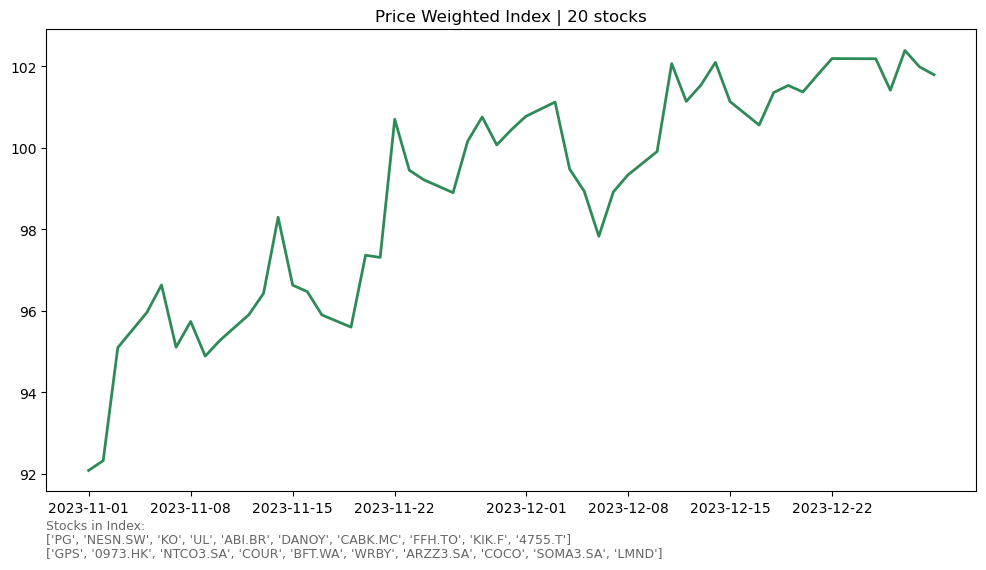

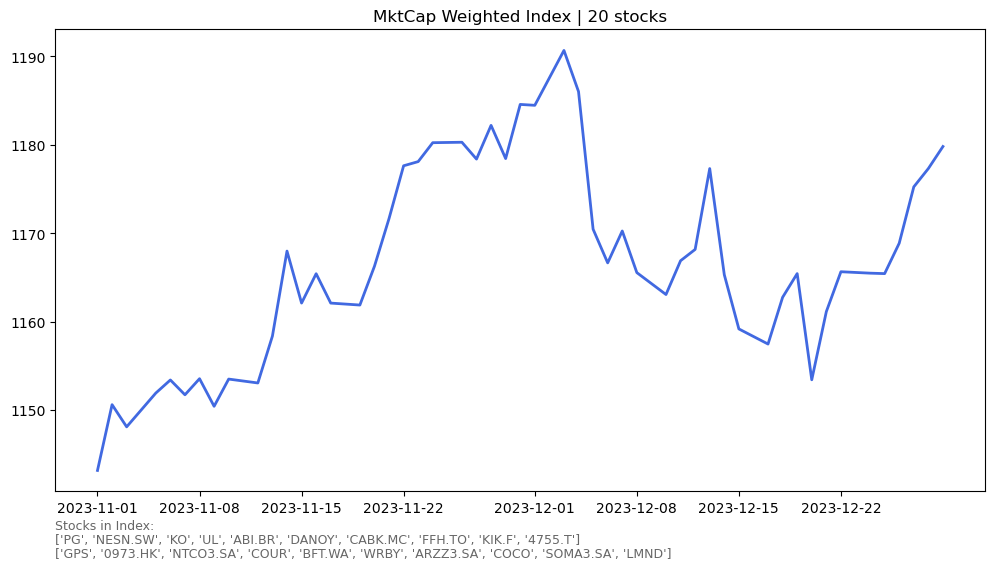

In [619]:
price_wgt_index = calc_px_weighted_index(daily_px_USD)
mktcap_wgt_index = calc_MC_weighted_index (daily_MC_USD)

In [648]:
def combine_norm_and_benchmark(px_df, mc_df):
    
    combined_df = pd.concat([px_df['Index'],mc_df['Index']], axis=1)
    combined_df.columns = ['Price Weighted Index', "Mkt Cap Weighted Index"]
    
    # Add S&P
    spx_object = yf.Ticker("^GSPC")
    spx = pd.DataFrame.from_dict(spx_object.history(start=s, end=e, interval = "1d"))
    spx = spx[['Close']]
    spx.columns = ['SPX']
    spx.index = pd.to_datetime(spx.index).date

    combined_df = pd.concat([combined_df, spx], axis=1)
    combined_df = combined_df.ffill()

    combined_df = combined_df.div(combined_df.iloc[0])
    return combined_df


In [650]:
## Contain SPX separately for graphing
spx_object = yf.Ticker("^GSPC")
spx = pd.DataFrame.from_dict(spx_object.history(start=s, end=e, interval = "1d"))
spx = spx[['Close']]
spx.columns = ['SPX']
spx.index = pd.to_datetime(spx.index).date

In [649]:
index_comparison_df = combine_norm_and_benchmark(price_wgt_index, mktcap_wgt_index)

### Graph Indices

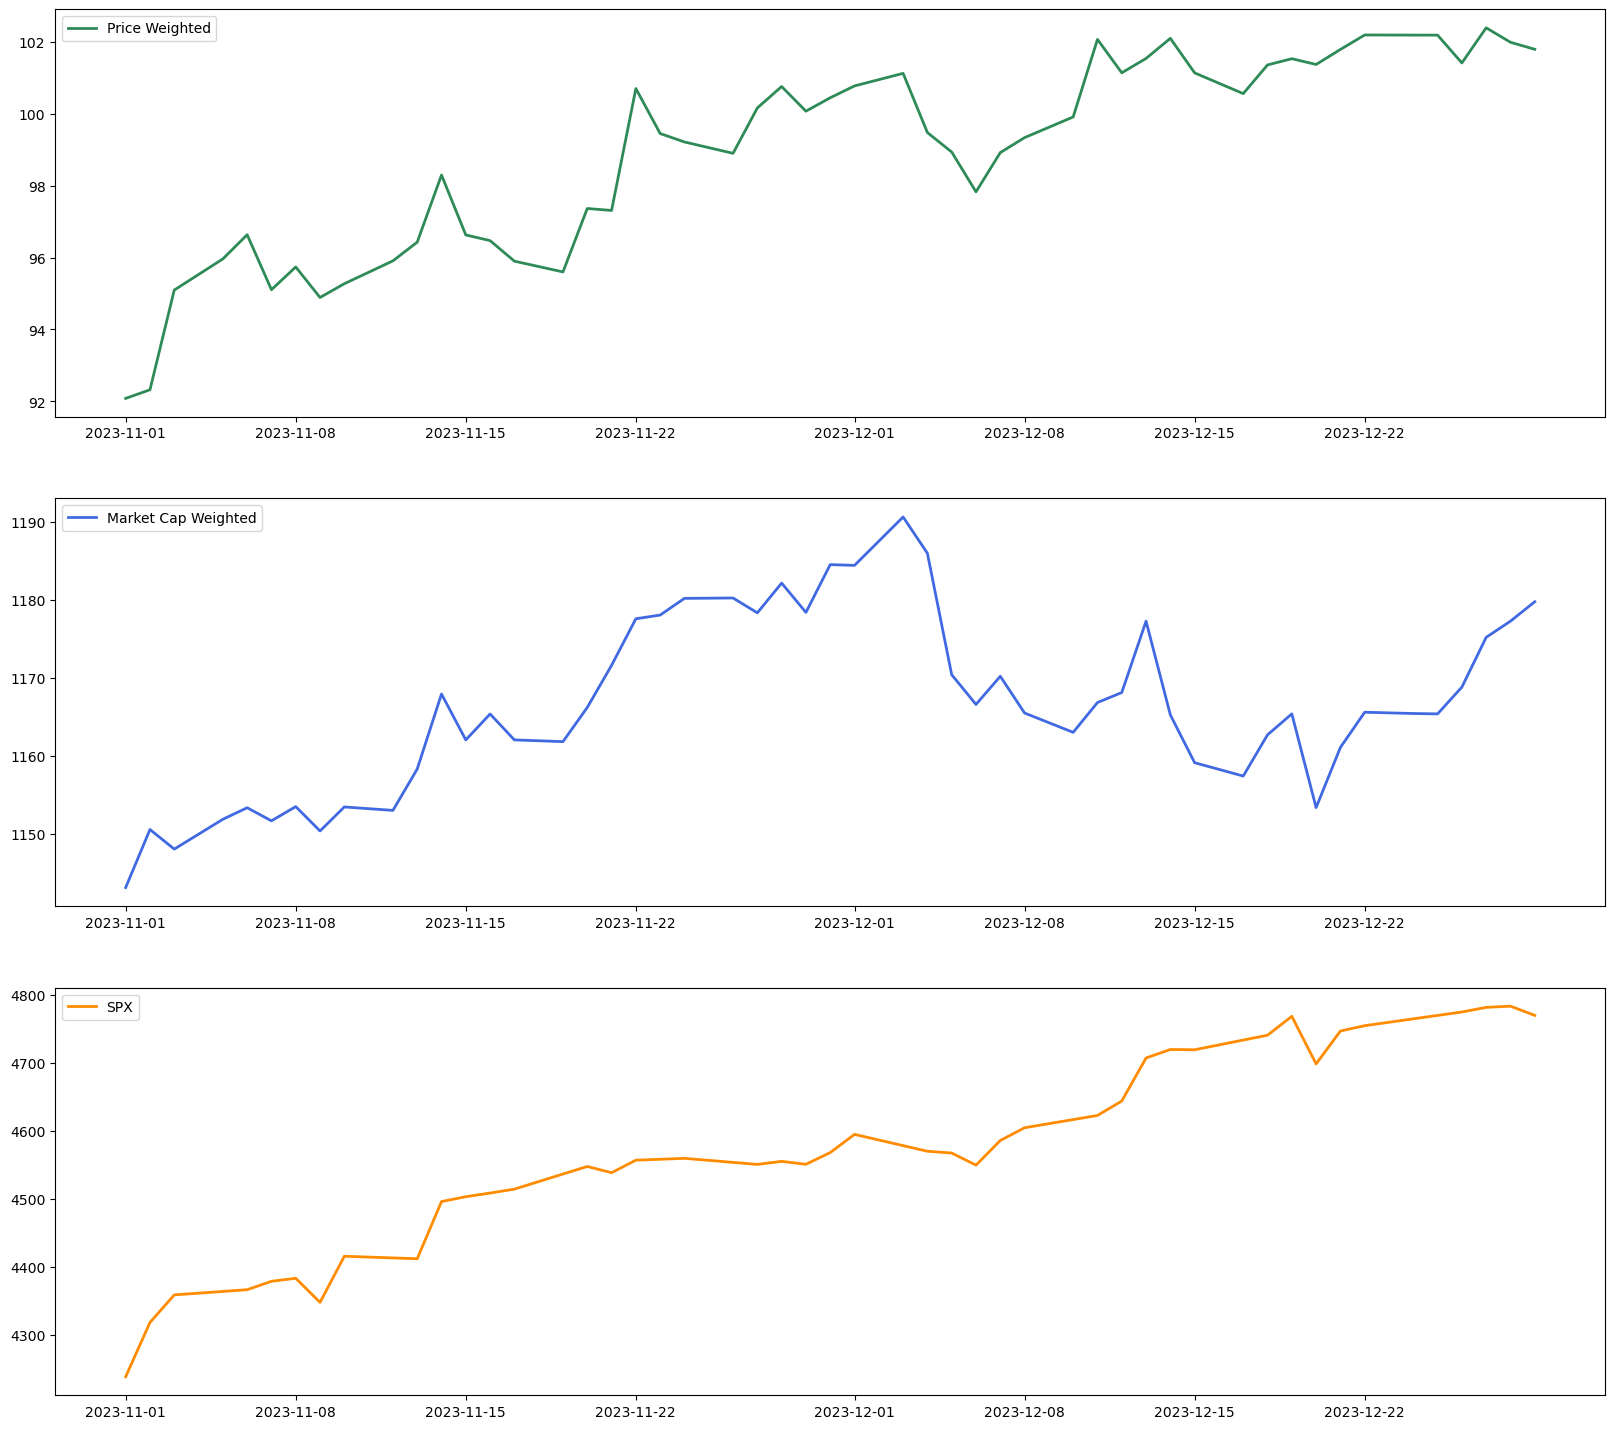

In [654]:
## Graph Separately
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize = (20,18))
ax0.plot(price_wgt_index['Index'], color = 'seagreen', linewidth=2, label = 'Price Weighted')
ax0.legend(loc=2)
ax1.plot(mktcap_wgt_index['Index'], color = 'royalblue', linewidth=2,label='Market Cap Weighted')
ax1.legend(loc=2)
ax2.plot(spx, color='darkorange', linewidth=2, label = 'SPX')
ax2.legend(loc=2)
plt.show()

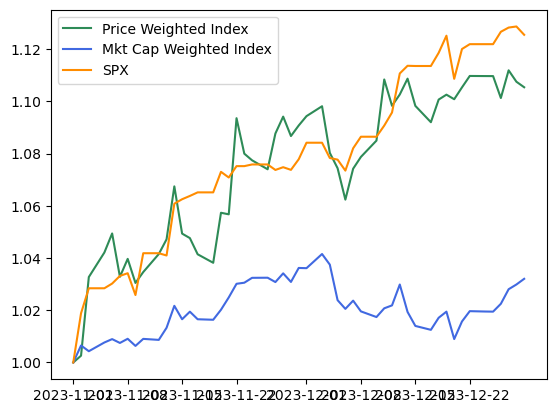

In [663]:
## Graph Together
#fig, ax = plt.subplots(figsize = (12,6))
index_comparison_df.plot(color = ['seagreen', 'royalblue', 'darkorange'])

plt.show()

In [135]:
def get_price_history2 (df, start, end):
    tickers_list = df['Ticker'].tolist()
    tickers_data= {}
    first_object = yf.Ticker(tickers_list[0])
    prices = pd.DataFrame.from_dict(first_object.history(start=start, end=end, interval = "1d"))
    prices.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
    prices.columns = [tickers_list[0]]
    
    for ticker in tickers_list[1:]:
        ticker_object = yf.Ticker(ticker)
        try:
            temp = pd.DataFrame.from_dict(ticker_object.history(start=start, end=end, interval = "1d"))
            temp.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
            temp.columns = [ticker]
            prices = prices.merge(temp, how="outer", left_index=True, right_index=True)
        except:
            continue

    return prices

In [137]:
prices = get_price_history2(stocks_updated, start=s, end=e)

KCT.AQ: Period '1mo' is invalid, must be one of ['1d', '5d']


In [138]:
print(prices.shape)

top20=prices.iloc[:,0:20]
print(top20.shape)
top30=prices.iloc[:,0:30]
print(top30.shape)

(4535, 67)
(4535, 20)
(4535, 30)


In [159]:
def calc_index2(df, num_in_index = 30, divisor = 1000000000):
    cols = df.columns
    mkt_cap_cols = []
    for col in cols:
        if "marketCapUSD" in col:
            mkt_cap_cols.append(col)
    
    mkt_cap_df = df[mkt_cap_cols].copy()
    
    mkt_cap_df = mkt_cap_df.iloc[0:num_in_index,:]
    #display(mkt_cap_df)
    
    # Sort by beginning mkt cap
    baseline_order = mkt_cap_df.iloc[0,:].sort_values(ascending=False)
    #baseline_all = baseline_order.index.to_list()

    
    mkt_cap_df['Total_Index'] = mkt_cap_df.sum(axis=0)/divisor
    
    return mkt_cap_df

In [160]:
calc_index2(stocks_updated)

,marketCapUSD,Total_Index
0,3.789540e+11,NaN
1,2.759200e+11,NaN
2,2.616030e+11,NaN
3,1.255920e+11,NaN
4,1.191740e+11,NaN
5,1.176780e+11,NaN
6,4.152268e+10,NaN
7,3.796921e+10,NaN
8,2.637475e+10,NaN
9,1.257604e+10,NaN


In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize = (20,18))
ax0.plot(normed_data0, color = 'seagreen', linewidth=2, label = 'With Subs')
ax0.legend(loc=3)
ax1.plot(normed_data1, color = 'royalblue', linewidth=2,label='Cert B Corps')
ax1.legend(loc=3)
ax2.plot(normed_data0, color = 'seagreen', linewidth=2, label = 'With Subs')
ax2.plot(normed_data1, color = 'royalblue', linewidth=2, label = 'Cert B Corps')
ax2.plot(normed_spx, color='darkorange', linewidth=2, label = 'SPX')
ax2.legend(loc=3)
plt.show()

In [105]:
## This is the old code.....

def get_price_history (df, start, end, add_subs = False):
    tickers_list = df['Ticker'].tolist()
    if add_subs:
        tickers_list = tickers_list + public_subs

    tickers_data= {}
    first_object = yf.Ticker(tickers_list[0])
    prices = pd.DataFrame.from_dict(first_object.history(start=start, end=end, interval = "1d"))
    prices.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
    prices.columns = [tickers_list[0]]
    
    for ticker in tickers_list[1:]:
        ticker_object = yf.Ticker(ticker)
        temp = pd.DataFrame.from_dict(ticker_object.history(start=start, end=end, interval = "1d"))
        temp.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
        temp.columns = [ticker]
        prices = prices.merge(temp, how="outer", left_index=True, right_index=True)

    return prices

In [104]:
#px_df = get_price_history(filtered, start=s, end = e)
spx_object = yf.Ticker("^GSPC")
spx = pd.DataFrame.from_dict(spx_object.history(start=s, end=e, interval = "1d"))
spx

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,4778.140137,4796.640137,4758.169922,4796.560059,3831020000,0.0,0.0
2022-01-04 00:00:00-05:00,4804.509766,4818.620117,4774.270020,4793.540039,4683170000,0.0,0.0
2022-01-05 00:00:00-05:00,4787.990234,4797.700195,4699.439941,4700.580078,4887960000,0.0,0.0
2022-01-06 00:00:00-05:00,4693.390137,4725.009766,4671.259766,4696.049805,4295280000,0.0,0.0
2022-01-07 00:00:00-05:00,4697.660156,4707.950195,4662.740234,4677.029785,4181510000,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-15 00:00:00-05:00,5003.140137,5032.720215,4999.439941,5029.729980,4137970000,0.0,0.0
2024-02-16 00:00:00-05:00,5031.129883,5038.700195,4999.520020,5005.569824,3833270000,0.0,0.0
2024-02-20 00:00:00-05:00,4989.319824,4993.709961,4955.020020,4975.509766,4034880000,0.0,0.0


In [ ]:
def add_shares_out (df, add_subs = False):
    df['BIRD_SharesOut'] = 152850000
    df['BIRD_MktCap'] = df['BIRD_SharesOut'] * df['BIRD']

    df['AMAL_SharesOut'] = 30430000
    df['AMAL_MktCap'] = df['AMAL_SharesOut'] * df['AMAL']

    df['COUR_SharesOut'] = 156950000
    df['COUR_MktCap'] = df['COUR_SharesOut'] * df['COUR']

    df['GROV_SharesOut'] = 37450000
    df['GROV_MktCap'] = df['GROV_SharesOut'] * df['GROV']

    df['LMND_SharesOut'] = 69920000
    df['LMND_MktCap'] = df['LMND_SharesOut'] * df['LMND']

    df['COCO_SharesOut'] = 56800000
    df['COCO_MktCap'] = df['COCO_SharesOut'] * df['COCO']

    df['VITL_SharesOut'] = 41600000
    df['VITL_MktCap'] = df['VITL_SharesOut'] * df['VITL']

    df['VVPR_SharesOut'] = 3270000
    df['VVPR_MktCap'] = df['VVPR_SharesOut'] * df['VVPR']

    df['WRBY_SharesOut'] = 117640000
    df['WRBY_MktCap'] = df['WRBY_SharesOut'] * df['WRBY']

    df['ZVIA_SharesOut'] = 50410000
    df['ZVIA_MktCap'] = df['ZVIA_SharesOut'] * df['ZVIA']


    if add_subs:
        df['UL_SharesOut'] = 2499020000
        df['UL_MktCap'] = df['UL_SharesOut'] * df['UL']

        df['PG_SharesOut'] = 2353020000
        df['PG_MktCap'] = df['PG_SharesOut'] * df['PG']

        df['BUD_SharesOut'] = 1986770000
        df['BUD_MktCap'] = df['BUD_SharesOut'] * df['BUD']

        df['KO_SharesOut'] = 4312460000
        df['KO_MktCap'] = df['KO_SharesOut'] * df['KO']


        df['GPS_SharesOut'] = 370830000 
        df['GPS_MktCap'] = df['GPS_SharesOut'] * df['GPS']


        df['OPY_SharesOut'] = 10290000
        df['OPY_MktCap'] = df['OPY_SharesOut'] * df['OPY']


        df['HAIN_SharesOut'] = 89830000
        df['HAIN_MktCap'] = df['HAIN_SharesOut'] * df['HAIN']


        df['DANOY_SharesOut'] = 2499020000
        df['DANOY_MktCap'] = df['DANOY_SharesOut'] * df['DANOY']
        
    col_order = df.columns.sort_values().tolist()
    df = df[col_order]
    
    return df


In [ ]:
#col_order = px_df.columns.sort_values().tolist()
#px_df = px_df[col_order]


In [ ]:
#px_df.to_csv('Public_B_Corps.csv')

In [ ]:
## This is the old code


def calc_index(df, divisor = 1000000000):
    cols = df.columns
    mkt_cap_cols = []
    for col in cols:
        if "MktCap" in col:
            mkt_cap_cols.append(col)
    
    mkt_cap_df = df[mkt_cap_cols].copy()
    
    # Sort by beginning mkt cap
    baseline_order = mkt_cap_df.iloc[0,:].sort_values(ascending=False)
    baseline_all = baseline_order.index.to_list()
    
    mkt_cap_df['Total_Index'] = mkt_cap_df[baseline_all].sum(axis=1)/divisor
    
    return mkt_cap_df

In [ ]:
def separate_subs (df, show_chart = True):

    px0 = get_price_history(df, start="2022-01-01", end = "2024-02-23", add_subs = True)
    px0 = add_shares_out(px0, add_subs = True)
    #px0.to_csv('24_03_19_BCorp_Index.csv')
    mkt_cap0 = calc_index(px0, divisor = 100000000)
    index0 = mkt_cap0[['Total_Index']]
    normed_data0 = index0.copy()
    normed_data0 = normed_data0.div(normed_data0.iloc[0]).fillna(0)


    px1 = get_price_history(df, start="2022-01-01", end = "2024-02-23", add_subs = False)
    px1 = add_shares_out(px1, add_subs = False)
    mkt_cap1 = calc_index(px1, divisor = 10000000)
    index1 = mkt_cap1[['Total_Index']]
    normed_data1 = index1.copy()
    normed_data1 = normed_data1.div(normed_data1.iloc[0]).fillna(0)
    
    # Add SPX:
    normed_spx = spx['Close'].copy()
    normed_spx = normed_spx.div(normed_spx.iloc[0]).fillna(0)
    
    if show_chart:
        fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize = (20,18))
        ax0.plot(normed_data0, color = 'seagreen', linewidth=2, label = 'With Subs')
        ax0.legend(loc=3)
        ax1.plot(normed_data1, color = 'royalblue', linewidth=2,label='Cert B Corps')
        ax1.legend(loc=3)
        ax2.plot(normed_data0, color = 'seagreen', linewidth=2, label = 'With Subs')
        ax2.plot(normed_data1, color = 'royalblue', linewidth=2, label = 'Cert B Corps')
        ax2.plot(normed_spx, color='darkorange', linewidth=2, label = 'SPX')
        ax2.legend(loc=3)
        plt.show()
        
    return px0, px1

In [ ]:
all_px, bcorp_px = separate_subs(us, show_chart = True)

In [ ]:
all_px.to_csv("B_Corp_Stocks.csv")

## Construct a Subset - look at reweighting?

In [ ]:
def determine_reweighting (df, n=8):
    cols = df.columns
    mkt_cap_cols = []
    for col in cols:
        if "MktCap" in col:
            mkt_cap_cols.append(col)
    mkt_cap_df = df[mkt_cap_cols].copy()
    
    # Sort by beginning mkt cap
    baseline_order = mkt_cap_df.iloc[0,:].sort_values(ascending=False)
    baseline_all = baseline_order.index.to_list()
    baseline_n = baseline_order.index[0:n].to_list()
    
    #Add Quarterly Flag
    mkt_cap_df['Quarter'] = mkt_cap_df.index.quarter
    
    mkt_cap_df['Reweight'] = mkt_cap_df['Quarter'] - mkt_cap_df['Quarter'].shift(periods=1)
    
    quarterly = mkt_cap_df[mkt_cap_df['Reweight'].isin([1,-3])]
    
    for i in range(quarterly.shape[0]):
        order = quarterly.iloc[i,:].sort_values(ascending=False)
        order_all = order.index.to_list()
        order_n = order.index[0:n].to_list()
        for j in order_n:
            if j not in baseline_n:
                print("Need to Reweight!", i, j)
                print("Baseline n", baseline_n)
                print("New n", order_n)
        baseline_n = order_n
    
    return quarterly
    #mkt_cap_df['Total_Index'] = mkt_cap_df[baseline_all].sum(axis=1)/10000000
    #mkt_cap_df['Total_Index_8'] = mkt_cap_df[baseline_8].sum(axis=1)/10000000

               

In [ ]:
quarterly = determine_reweighting(us, n = 12)

### Visualization

#### Seaborn color maps:
‘Accent’, ‘Accent_r’, ‘Blues’, ‘Blues_r’, ‘BrBG’, ‘BrBG_r’, ‘BuGn’, ‘BuGn_r’, ‘BuPu’, ‘BuPu_r’, ‘CMRmap’, ‘CMRmap_r’, ‘Dark2’, ‘Dark2_r’, ‘GnBu’, ‘GnBu_r’, ‘Greens’, ‘Greens_r’, ‘Greys’, ‘Greys_r’, ‘OrRd’, ‘OrRd_r’, ‘Oranges’, ‘Oranges_r’, ‘PRGn’, ‘PRGn_r’, ‘Paired’, ‘Paired_r’, ‘Pastel1’, ‘Pastel1_r’, ‘Pastel2’, ‘Pastel2_r’, ‘PiYG’, ‘PiYG_r’, ‘PuBu’, ‘PuBuGn’, ‘PuBuGn_r’, ‘PuBu_r’, ‘PuOr’, ‘PuOr_r’, ‘PuRd’, ‘PuRd_r’, ‘Purples’, ‘Purples_r’, ‘RdBu’, ‘RdBu_r’, ‘RdGy’, ‘RdGy_r’, ‘RdPu’, ‘RdPu_r’, ‘RdYlBu’, ‘RdYlBu_r’, ‘RdYlGn’, ‘RdYlGn_r’, ‘Reds’, ‘Reds_r’, ‘Set1’, ‘Set1_r’, ‘Set2’, ‘Set2_r’, ‘Set3’, ‘Set3_r’, ‘Spectral’, ‘Spectral_r’, ‘Wistia’, ‘Wistia_r’, ‘YlGn’, ‘YlGnBu’, ‘YlGnBu_r’, ‘YlGn_r’, ‘YlOrBr’, ‘YlOrBr_r’, ‘YlOrRd’, ‘YlOrRd_r’, ‘afmhot’, ‘afmhot_r’, ‘autumn’, ‘autumn_r’, ‘binary’, ‘binary_r’, ‘bone’, ‘bone_r’, ‘brg’, ‘brg_r’, ‘bwr’, ‘bwr_r’, ‘cividis’, ‘cividis_r’, ‘cool’, ‘cool_r’, ‘coolwarm’, ‘coolwarm_r’, ‘copper’, ‘copper_r’, ‘crest’, ‘crest_r’, ‘cubehelix’, ‘cubehelix_r’, ‘flag’, ‘flag_r’, ‘flare’, ‘flare_r’, ‘gist_earth’, ‘gist_earth_r’, ‘gist_gray’, ‘gist_gray_r’, ‘gist_heat’, ‘gist_heat_r’, ‘gist_ncar’, ‘gist_ncar_r’, ‘gist_rainbow’, ‘gist_rainbow_r’, ‘gist_stern’, ‘gist_stern_r’, ‘gist_yarg’, ‘gist_yarg_r’, ‘gnuplot’, ‘gnuplot2’, ‘gnuplot2_r’, ‘gnuplot_r’, ‘gray’, ‘gray_r’, ‘hot’, ‘hot_r’, ‘hsv’, ‘hsv_r’, ‘icefire’, ‘icefire_r’, ‘inferno’, ‘inferno_r’, ‘jet’, ‘jet_r’, ‘magma’, ‘magma_r’, ‘mako’, ‘mako_r’, ‘nipy_spectral’, ‘nipy_spectral_r’, ‘ocean’, ‘ocean_r’, ‘pink’, ‘pink_r’, ‘plasma’, ‘plasma_r’, ‘prism’, ‘prism_r’, ‘rainbow’, ‘rainbow_r’, ‘rocket’, ‘rocket_r’, ‘seismic’, ‘seismic_r’, ‘spring’, ‘spring_r’, ‘summer’, ‘summer_r’, ‘tab10’, ‘tab10_r’, ‘tab20’, ‘tab20_r’, ‘tab20b’, ‘tab20b_r’, ‘tab20c’, ‘tab20c_r’, ‘terrain’, ‘terrain_r’, ‘turbo’, ‘turbo_r’, ‘twilight’, ‘twilight_r’, ‘twilight_shifted’, ‘twilight_shifted_r’, ‘viridis’, ‘viridis_r’, ‘vlag’, ‘vlag_r’, ‘winter’, ‘winter_r’

Attributes = ['address1',
 'city',
 'state',
 'zip',
 'country',
 'phone',
 'website',
 'industry',
 'industryKey',
 'industryDisp',
 'sector',
 'sectorKey',
 'sectorDisp',
 'longBusinessSummary',
 'fullTimeEmployees',
 'companyOfficers',
 'auditRisk',
 'boardRisk',
 'compensationRisk',
 'shareHolderRightsRisk',
 'overallRisk',
 'governanceEpochDate',
 'compensationAsOfEpochDate',
 'maxAge',
 'priceHint',
 'previousClose',
 'open',
 'dayLow',
 'dayHigh',
 'regularMarketPreviousClose',
 'regularMarketOpen',
 'regularMarketDayLow',
 'regularMarketDayHigh',
 'beta',
 'forwardPE',
 'volume',
 'regularMarketVolume',
 'averageVolume',
 'averageVolume10days',
 'averageDailyVolume10Day',
 'bid',
 'ask',
 'bidSize',
 'askSize',
 'marketCap',
 'fiftyTwoWeekLow',
 'fiftyTwoWeekHigh',
 'priceToSalesTrailing12Months',
 'fiftyDayAverage',
 'twoHundredDayAverage',
 'currency',
 'enterpriseValue',
 'profitMargins',
 'floatShares',
 'sharesOutstanding',
 'sharesShort',
 'sharesShortPriorMonth',
 'sharesShortPreviousMonthDate',
 'dateShortInterest',
 'sharesPercentSharesOut',
 'heldPercentInsiders',
 'heldPercentInstitutions',
 'shortRatio',
 'shortPercentOfFloat',
 'impliedSharesOutstanding',
 'bookValue',
 'priceToBook',
 'lastFiscalYearEnd',
 'nextFiscalYearEnd',
 'mostRecentQuarter',
 'netIncomeToCommon',
 'trailingEps',
 'forwardEps',
 'pegRatio',
 'enterpriseToRevenue',
 'enterpriseToEbitda',
 '52WeekChange',
 'SandP52WeekChange',
 'exchange',
 'quoteType',
 'symbol',
 'underlyingSymbol',
 'shortName',
 'longName',
 'firstTradeDateEpochUtc',
 'timeZoneFullName',
 'timeZoneShortName',
 'uuid',
 'messageBoardId',
 'gmtOffSetMilliseconds',
 'currentPrice',
 'targetHighPrice',
 'targetLowPrice',
 'targetMeanPrice',
 'targetMedianPrice',
 'recommendationMean',
 'recommendationKey',
 'numberOfAnalystOpinions',
 'totalCash',
 'totalCashPerShare',
 'ebitda',
 'totalDebt',
 'quickRatio',
 'currentRatio',
 'totalRevenue',
 'debtToEquity',
 'revenuePerShare',
 'returnOnAssets',
 'returnOnEquity',
 'freeCashflow',
 'operatingCashflow',
 'revenueGrowth',
 'grossMargins',
 'ebitdaMargins',
 'operatingMargins',
 'financialCurrency',
 'trailingPegRatio']